**<div align="center">MOSCOW STATE EDUCATIONAL INSTITUTION</div>**
**<div align="center">OF ADDITIONAL PROFESSIONAL EDUCATION</div>**
**<div align="center">CENTER FOR PROFESSIONAL QUALIFICATIONS AND EMPLOYMENT PROMOTION</div>**
**<div align="center">"PROFESSIONAL"</div>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <div align="center"> FINAL CERTIFICATION WORK </div>
<div align="center"> The thesis </div>
<div align="center"> "Data analysis using Python" </div>
<div align="center"> (based on the wine rating task) </div> 
<div align="center">course participant Konstantin Bantov<br>group No. 472 </div>
 <div align="center">according to the professional retraining program </div>
<div align="center"> "Data analyst" </div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <div align="center"> Moscow, 2022</div>

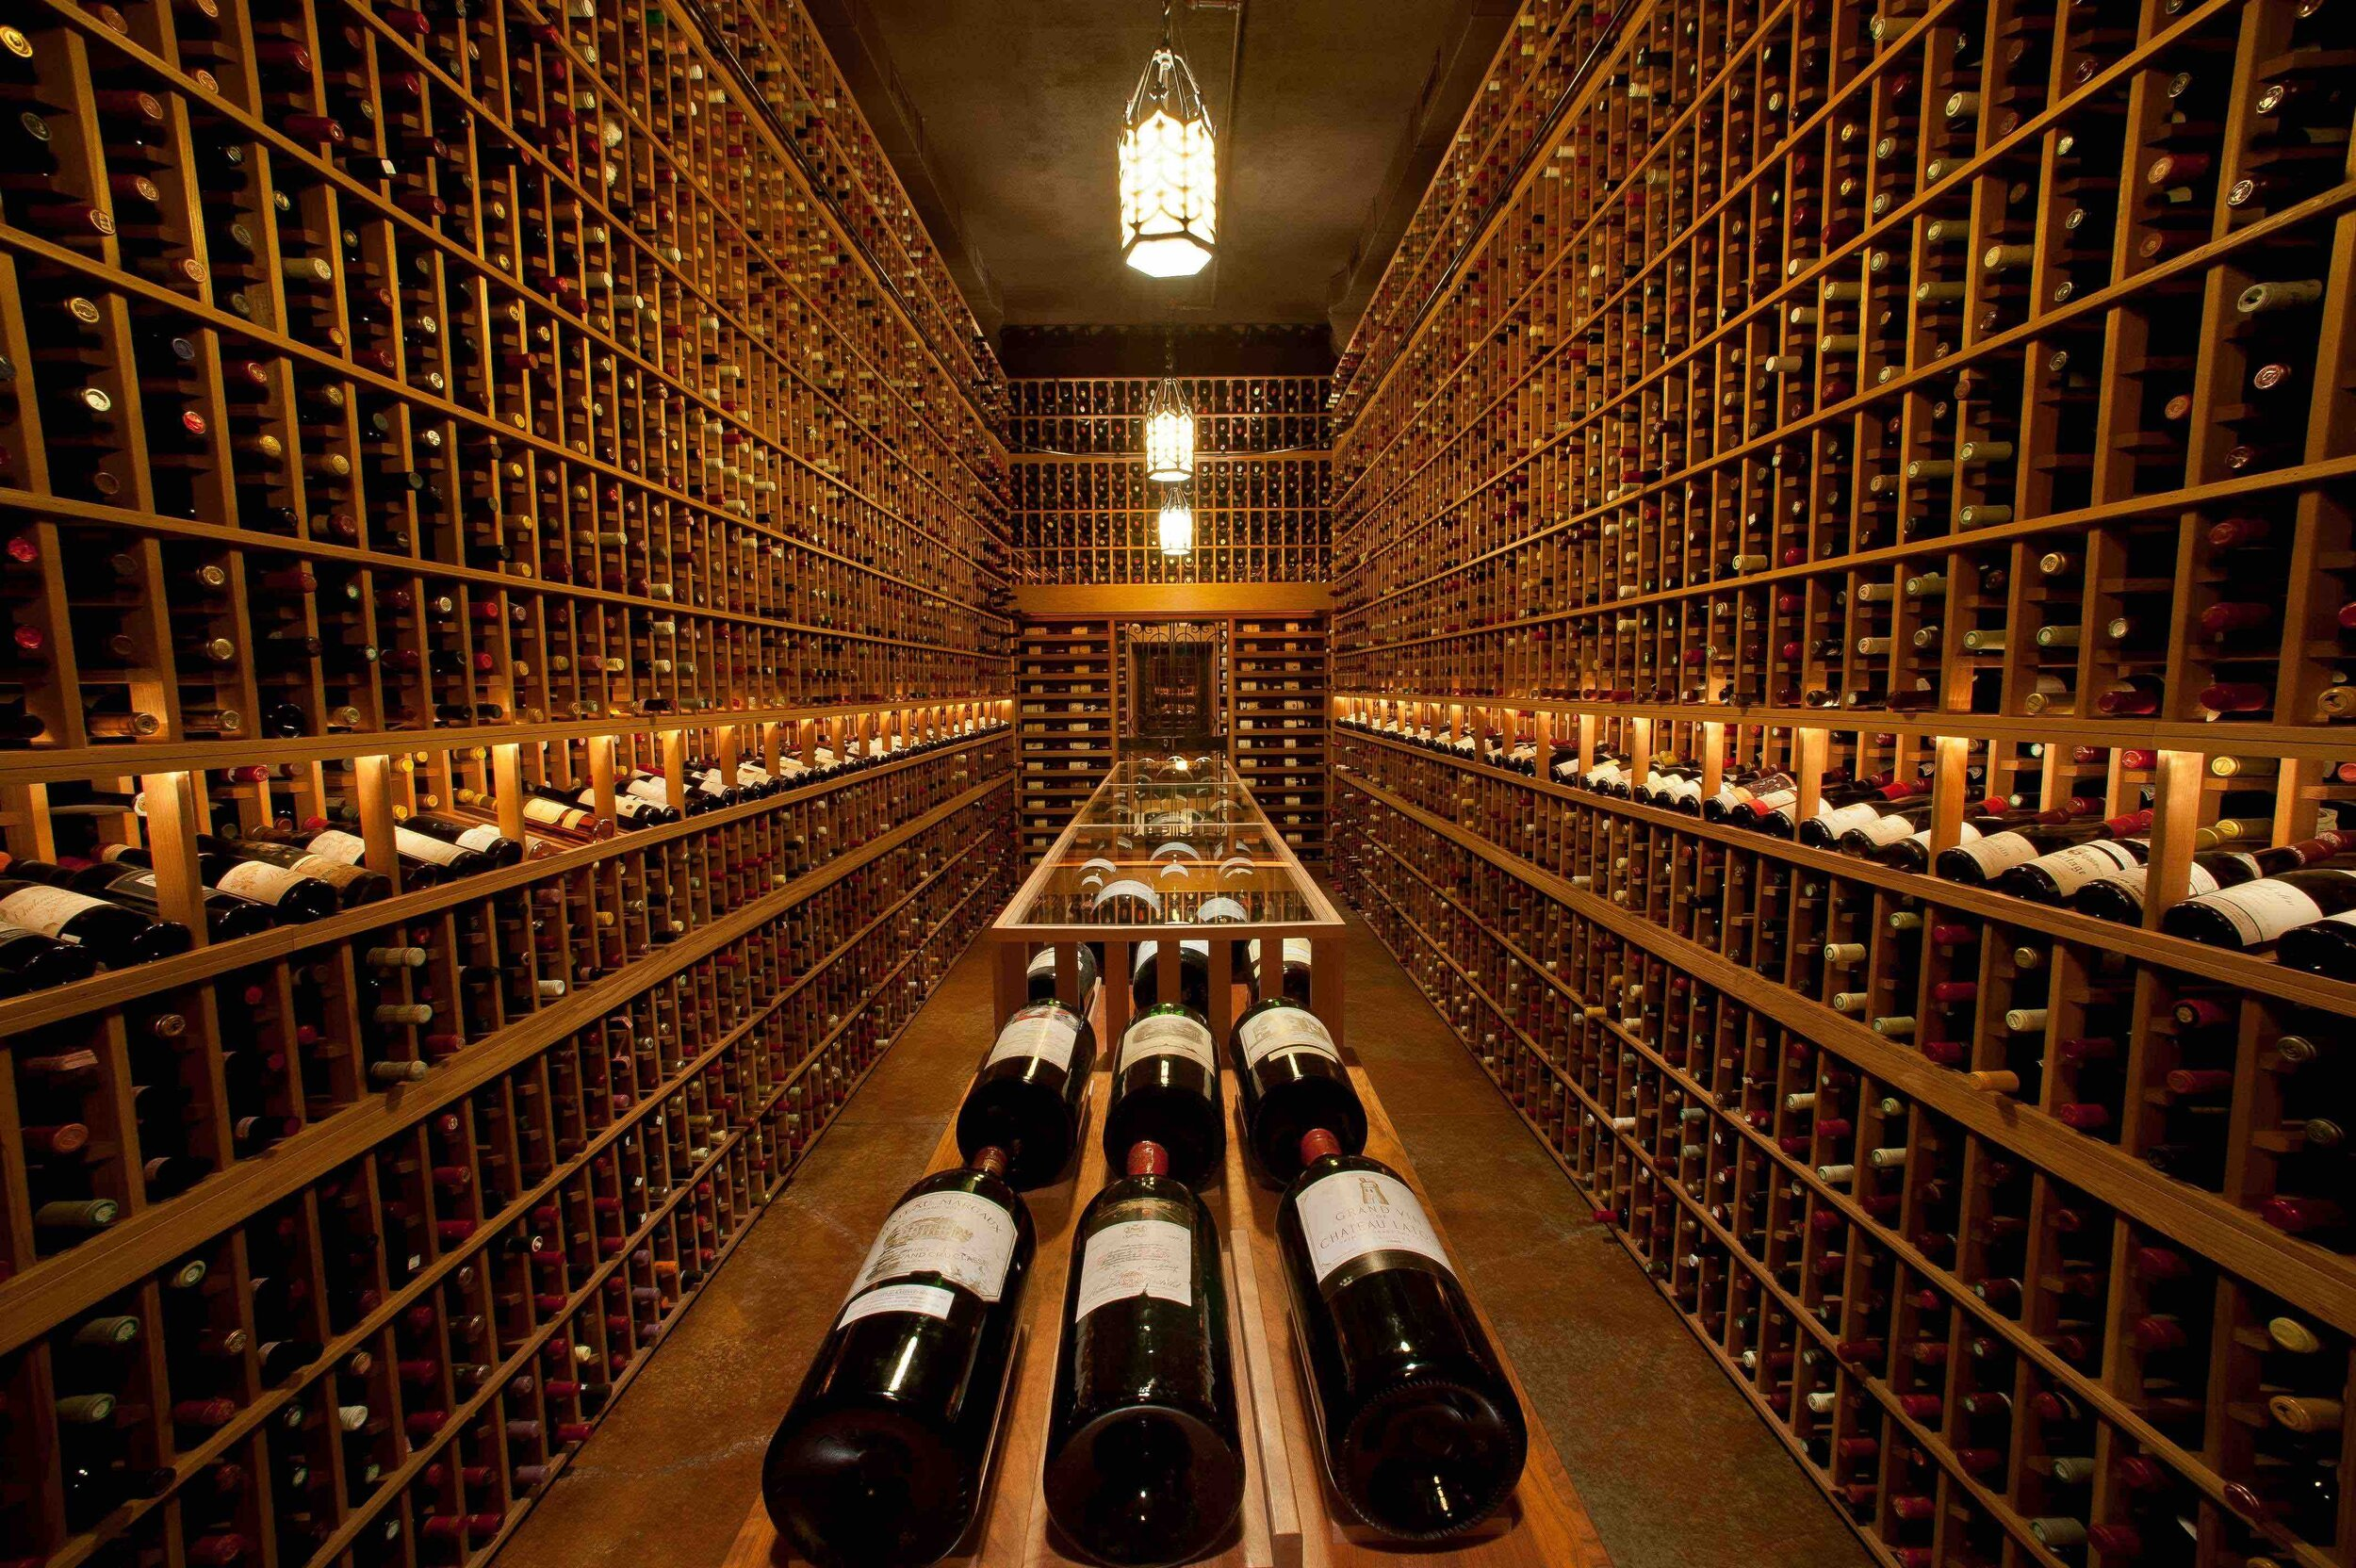

Task description:

It is necessary to identify the patterns that determine the popularity of the wine brand and try to find out what can be offered to wine buyers when choosing wine. This will allow you to bet on a potentially popular product and plan, for example, an advertising campaign for online stores that sell wine.

Completing the task involves:
1. <a href=#1>data preprocessing</a>
2. <a href=#2>exploratory data analysis</a>
3. <a href=#3>drawing up a portrait of a wine reviewer</a>
4. <a href=#4>hypothesis testing</a>
5. <a href=#5>building a regression model of the relationship between score and price</a>
6. <a href=#6>statement of conclusions</a>

The goal of this project is to find out why wine is so popular in the world in terms of data analysis. In other words, to identify which signs most affect the rating of wine. The analysis uses a dataset from Kaggle, the world's largest community of data and machine learning specialists. The initial dataset consists of 10 features (2 numeric features and 8 categorical features).

<a id="1"></a>

### <a name="1">1. Data preprocessing</a>
The main tasks of the stage:
1. Import libraries;
2. Upload data;
3. Replace column names (if necessary);
4. Convert the data to the appropriate types;
5. Process omissions (if necessary);
6. Check for duplicates.

Let's import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# importing the 'warnings' library
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\kdogu\AppData\Local\Temp\ipykernel_10384\338033758.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Data columns

- Country - the country of origin of the wine.
- Description — description of the taste profile of the wine.
- Designation - vineyard, where grapes for wine come from.
- Points - the number of points that Wine Enthusiast magazine rated the wine on a scale from 1 to 100.
- Price - the cost of one bottle of wine.
- Province — the province or state from which the wine is produced.
- Region 1 — a wine-making zone in a province or state (for example, Napa Valley in California).
- Region 2 — (optional) a more specific region in the wine region (e.g. Rutherford in Napa Valley).
- Variety — a grape variety from which wine is made (for example, Pinot Noir).
- Winery — a winery that produces wine.

Loading data

In [2]:
df1 = pd.read_csv('./data/wine_reviews.csv')
df1.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [3]:
shape = df1.shape
print("Dataset size (rows, columns):\t {}".format(shape))

Dataset size (rows, columns):	 (20000, 10)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


The number of values in the columns varies. This indicates that there are empty values in the data. The points and price attribute are numeric. Using the seaborn library, we will build a heat map for data visualization.

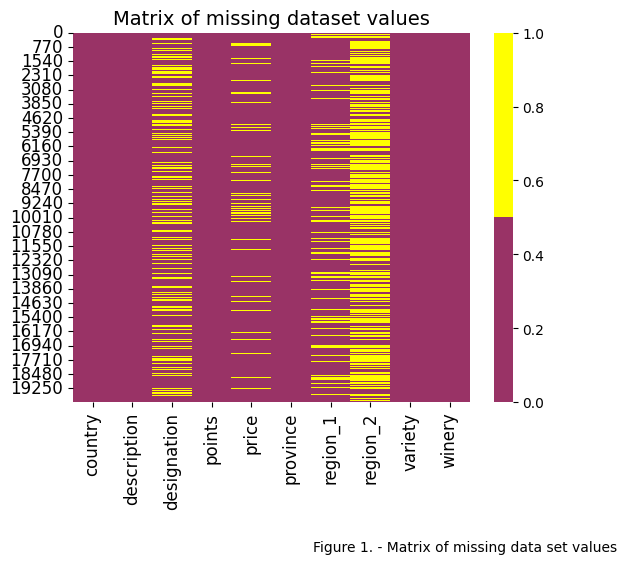

In [5]:
num = 1
colours = ['#993366', '#FFFF00']
sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Matrix of missing dataset values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, f"Figure {num}. - Matrix of missing data set values")
num += 1
plt.show()

The number of missing values in each feature.

In [6]:
print(df1.isnull().sum())

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


The region_2 field is not filled in by more than 50%, we will remove this feature since it is not informative.  The designation feature is not important for the study. Let's delete corresponding columns.

In [7]:
# Drops unnecessary columns
df = df1.drop(columns = ["region_2", "designation"])

Delete the records with empty prices

In [8]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 1802
Total records: 20000
Percentage remaining: 90.99%


If we delete all records with missing prices, we will be left with 90.9% of the dataset. We can safely discard records with missing values and not affect the results dramatically.

In [9]:
df = df.dropna(axis='index', how='any', subset=['price'])
print(df.count())

country        18198
description    18198
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


In [10]:
print(df.isnull().sum())

country           0
description       0
points            0
price             0
province          0
region_1       3165
variety           0
winery            0
dtype: int64


In [11]:
print(df.count())

country        18198
description    18198
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


Let's leave region_1 unchanged

Add the wine color column

In [12]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
}
df['color']= df['variety'].map(color)

We will fill in the missing regions (the "region_1" feature).
We will form a dataset for the search.

In [13]:
req_list = df[['winery','country']][df['region_1'].isna()].drop_duplicates()
req_list['wineryreq'] = df['winery'].apply(lambda x: "+".join(x.split(" "))).map(str) + "+" + df['country']
req_list['address'] = np.NaN
req_list.head()

,winery,country,wineryreq,address
5,F X Pichler,Austria,F+X+Pichler+Austria,NaN
11,Santa Rita,Chile,Santa+Rita+Chile,NaN
15,Indomita,Chile,Indomita+Chile,NaN
20,Slowine,South Africa,Slowine+South Africa,NaN
33,Undurraga,Chile,Undurraga+Chile,NaN


We will conduct a search in Google on the site https://www.vivino.com / by request of the wine region

For requests like:
- 'req_list['wineryreq'].loc[i]+"wine region"'
-  'req_list['wineryreq'].loc[i]+" vivino region"'

Google provides a table in the search results indicating the wine region from which the desired region can be extracted in a cycle.

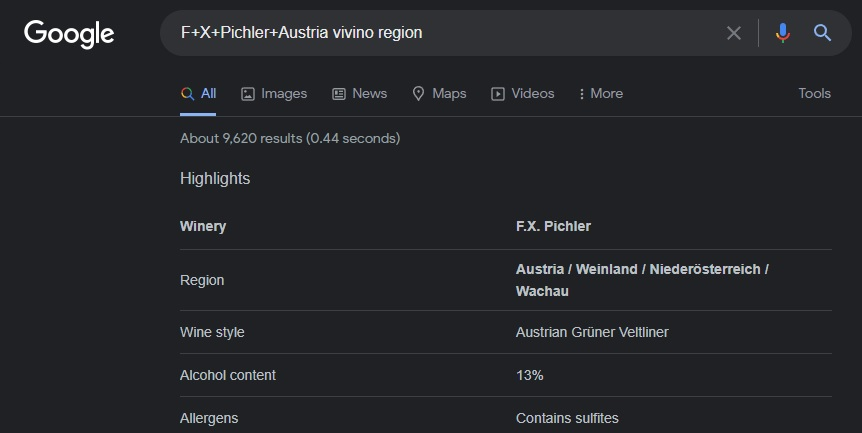
<p style="text-align: center"><font size="1">Figure 2. - example of Google search results</font></p>

In [14]:
import urllib #Library for URL processing
from requests_html import HTMLSession #Library for parsing HTML pages
def get_source(url): 
    """
    функция, формирующая GET-запрос
    """
    try:
        session = HTMLSession()        
        # website vivino.com blocks parsing using urllib. Circumventing the ban by specifying Mozilla user-agent.        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:79.0) Gecko/20100101 Firefox/79.0',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Accept-Language': 'en-GB,en;q=0.5',
            'Upgrade-Insecure-Requests': '1',
            'Connection': 'keep-alive',
            'Pragma': 'no-cache',
            'Cache-Control': 'no-cache',
            'TE': 'Trailers',}
        response = session.get(url, headers=headers)
        #print(response.html.html)
        return response
    except requests.exceptions.RequestException as e:
        print(e)
def google_search_vivino(query):    
    """
    a function for Google search.
    """    
    query = urllib.parse.quote_plus(query, encoding='UTF8') #converting a request to a web format.
    response = get_source("https://www.google.ru/search?q=" + query) #getting search results    
    results = response.html.find("tr") #table tag search
    res = np.NaN  
    try:
        for i in results:  #search for the word 'Region' in the table       
            if i.text.find("Region") != -1:
                res = i.text
    except:
        res = np.NaN  #in case of a search error or if there is no table in the search results, specify np.NaN
    return res

Considering that it is necessary to send more than 900 requests to Google in a cycle and do it without the Google Search API key, it is necessary to form requests with a delay for a primitive imitation of the fact that the requests are carried out by a person. If there is no delay in requests, Google blocks the IP from which the requests leave, rightly believing that spamming is taking place. The delay interval between requests is set to 10 seconds, and a delay of another 50 seconds is added every 50 requests. The complete execution of the cycle takes about 3 hours. The results are saved in PKL format.

```python
import time
j = 0
for i in req_list.index:    
    j += 1    
    time.sleep(10)
    results = google_search_vivino(req_list['wineryreq'].loc[i]+" vivino region")
    if isinstance(results, float):
        time.sleep(5)
        results = google_search_vivino(req_list['wineryreq'].loc[i]+" wines region")
    print(req_list['wineryreq'].loc[i], results)
    req_list.loc[i,'address'] = results
    if j%50 == 0:
        time.sleep(100)
req_list.to_pickle('missing_adresses_vivino.pkl')
```

In [15]:
req_list = pd.read_pickle('missing_adresses_vivino.pkl')
req_list.head()

,winery,country,wineryreq,address
5,F X Pichler,Austria,F+X+Pichler+Austria,Region\nAustria / Weinland / Niederösterreich ...
11,Santa Rita,Chile,Santa+Rita+Chile,Region\nChile / Central Valley
20,Slowine,South Africa,Slowine+South+Africa,Region\nAfrique du Sud / Western Cape / Cape S...
37,Dry River,New Zealand,Dry+River+New+Zealand,Region\nNew Zealand / North Island / Wairarapa...
38,Casa Santos Lima,Portugal,Casa+Santos+Lima+Portugal,Region\nPortugal / Lisboa


The line with the region in the 'address' column is separated by a slash. The required region is the far right.

In [16]:
req_list['m_region'] = req_list['address'].apply(lambda x: str(x).split('/')[-1].strip())
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).split('delimiter')[-1].strip())
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region:", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Sub-Region\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region:\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("\n", ""))
req_list.loc[req_list['m_region'] == 'nan','m_region'] = np.NaN
req_list.loc[req_list['m_region'] == '','m_region'] = np.NaN
req_list.head()

,winery,country,wineryreq,address,m_region
5,F X Pichler,Austria,F+X+Pichler+Austria,Region\nAustria / Weinland / Niederösterreich ...,Wachau
11,Santa Rita,Chile,Santa+Rita+Chile,Region\nChile / Central Valley,Central Valley
20,Slowine,South Africa,Slowine+South+Africa,Region\nAfrique du Sud / Western Cape / Cape S...,Overberg
37,Dry River,New Zealand,Dry+River+New+Zealand,Region\nNew Zealand / North Island / Wairarapa...,Martinborough
38,Casa Santos Lima,Portugal,Casa+Santos+Lima+Portugal,Region\nPortugal / Lisboa,Lisboa


In [17]:
set(req_list['m_region'])

{'Aconcagua Valley',
 'Alenquer',
 'Alentejano',
 'Alentejo',
 'Amyndeon',
 'Attiki',
 'Awatere Valley',
 'Baden',
 'Bairrada',
 'Bannockburn',
 'Basto',
 'Beiras',
 'Bekaa Valley',
 'Breede River Valley',
 'Breedekloof',
 'Burgenland',
 'Cachapoal Valley',
 'Cape Agulhas',
 'Casablanca Valley',
 'Central Otago',
 'Central Valley',
 'Citrusdal Mountain',
 'Coastal Region',
 'Colchagua Valley',
 'Constantia',
 'Curico Valley',
 'DOURO',
 'Dalmatia',
 'Dealu Mare',
 'Douro',
 'Drama',
 'Durbanville',
 'Duriense',
 'Dão',
 'Elgin',
 'Elqui Valley',
 'Evora',
 'Franschhoek',
 'Germany',
 'Gimblett Gravels',
 'Gisborne',
 'Golan Heights (SY)',
 'Goriška Brda',
 "Hawke's Bay",
 'Huasco Valley',
 'Istra',
 'Johannisberg',
 'Judean Hills',
 'Kamptal',
 'Kanzem',
 'Kremstal',
 'Leiwen',
 'Leyda Valley',
 'Limarí Valley',
 'Lisboa',
 'Loncomilla Valley',
 'Lontue Valley',
 'Macedonia',
 'Maipo Valley',
 'Mantinea',
 'Marlborough',
 'Martinborough',
 'Maule Valley',
 'Moldova',
 'Montevideo',
 'M

Attach the req_list dataset to the original dataset via the wineryreq field.

In [18]:
substitute = req_list[['wineryreq','m_region']].set_index('wineryreq').to_dict()['m_region']
df['wineryreq'] = df['winery'].apply(lambda x: "+".join(x.split(" "))).map(str) + "+" +  df['country']
df.loc[df['region_1'].isna() == True, 'region_1'] = df['wineryreq'].map(substitute)
df.isna().sum()

country           0
description       0
points            0
price             0
province          0
region_1       1894
variety           0
winery            0
color          3157
wineryreq         0
dtype: int64

Remove the missing values.

In [19]:
df = df.dropna(axis='index', how='any', subset=['color', 'region_1'])
df = df.drop(columns = 'wineryreq')
print(df.count())

country        13517
description    13517
points         13517
price          13517
province       13517
region_1       13517
variety        13517
winery         13517
color          13517
dtype: int64


Remove duplicates

In [20]:
df=df.drop_duplicates(keep=False)
df.head()

,country,description,points,price,province,region_1,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red


In [21]:
df.isna().mean()

country        0.0
description    0.0
points         0.0
price          0.0
province       0.0
region_1       0.0
variety        0.0
winery         0.0
color          0.0
dtype: float64

In [22]:
df.shape

(12071, 9)

### <a id="2">2. Exploratory data analysis</a>

The main tasks of the stage:<br>
1. Consider each feature of the dataframe
2. For each country, find the average price of wine. For each country, find the maximum price of wine. For each country, find the minimum price of wine. For each country, find the number of entries.
3. Determine which wines are leading the ratings. Choose several wines with the best rating.
    - Plot the "box with whiskers" according to ratings by country, by wine varieties. Describe the result.
    - Determine how reviews within one country affect prices.
    - Build a scatter plot and calculate the correlation between ratings and prices. Formulate conclusions.
    - Look at the overall distribution of wines by country. What can be said about the most widespread varieties of wine?
    - Which region's wines (province) get the best rating? Are more expensive wines priced higher?
    - Which part of the world produces wines with a higher rating?
    - Which wine description is more highly appreciated?
    - Which kind of wine is more highly appreciated?
    - How much money does it cost to get a highly rated wine in the country?
    - Which wineries produce the most expensive/highly rated wines?
    - Which wineries/regions/countries produce wines with the lowest rating?
4. Conduct an analysis of the wine variety (for example, white wine Chardonnay) and analyzed the cost and quality in the main producing regions in the world.

In [23]:
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}

In [24]:
df['part_world'] = df.country.map(country_to_continent)

##### Information about a dataframe features

In [25]:
df.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America


##### Distribution of wines by country.

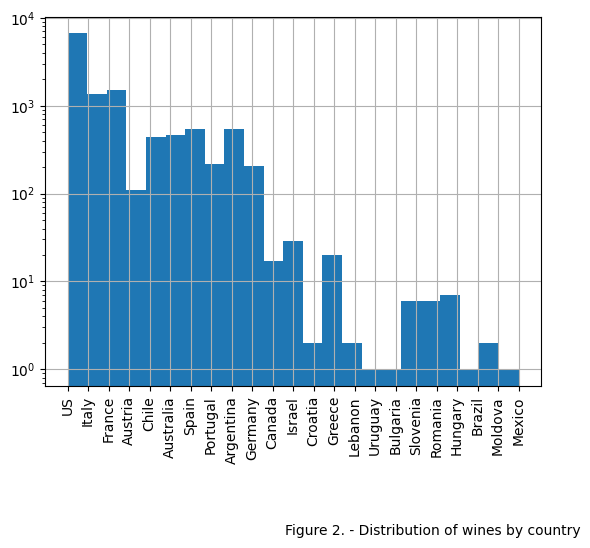

In [26]:
df.country.hist(bins=len(df.country.unique()), xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Figure {num}. - Distribution of wines by country")
num += 1
plt.show()

In [27]:
print(f"The largest number of wines is represented by producers from {df.country.value_counts().idxmax()} \
- {round(df.country.value_counts()[0]/df.shape[0]*100, 2)}%.")

The largest number of wines is represented by producers from US - 54.8%.


##### Distribution of wines by parts of world.

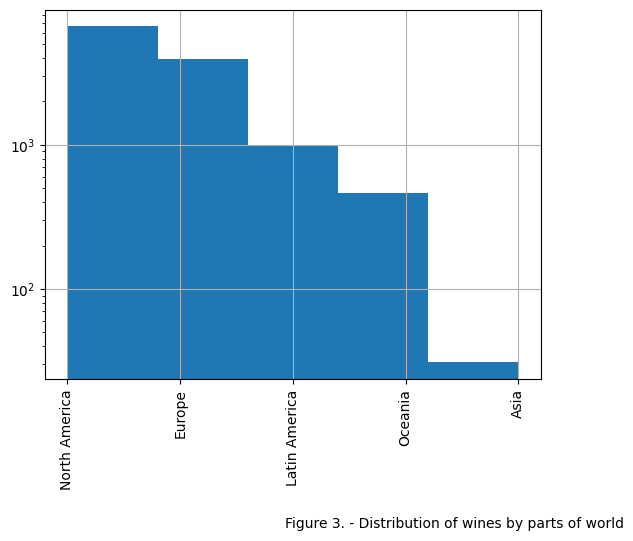

In [28]:
df.part_world.hist(bins=len(df.part_world.unique()), xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Figure {num}. - Distribution of wines by parts of world")
num += 1
plt.show()

In [29]:
print(f"The largest number of wines is represented by producers from {df.part_world.value_counts().idxmax()}  \
- {round(df.part_world.value_counts()[0]/df.shape[0]*100, 2)}%.")

The largest number of wines is represented by producers from North America  - 54.94%.


##### Distribution of wines by the 10 largest provinces.

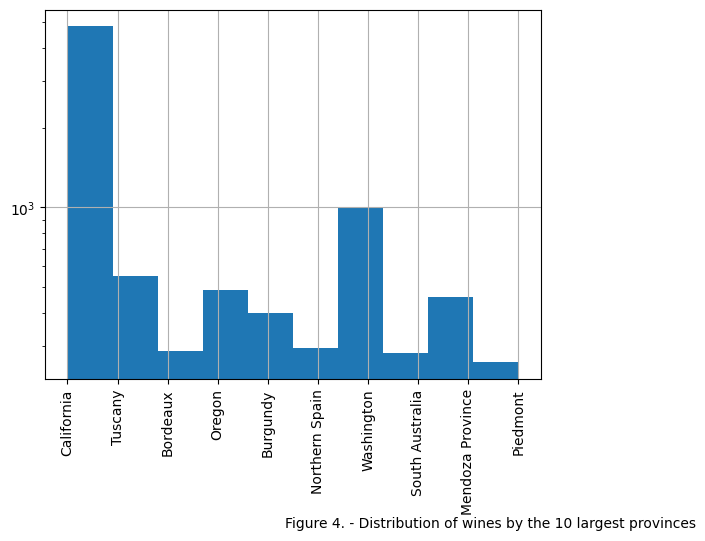

In [30]:
gProvince = df.province.value_counts()[:10].index
df[df['province'].isin(gProvince)]['province'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Figure {num}. - Distribution of wines by the 10 largest provinces")
num += 1
plt.show()

In [31]:
print(f"Наибольшее количество вин представлено производителями из провинции {df.province.value_counts().idxmax()} \
- {round(df.province.value_counts()[0]/df.shape[0]*100, 2)}%.")

Наибольшее количество вин представлено производителями из провинции California - 39.81%.


##### Distribution of wines by the 10 largest wine regions.

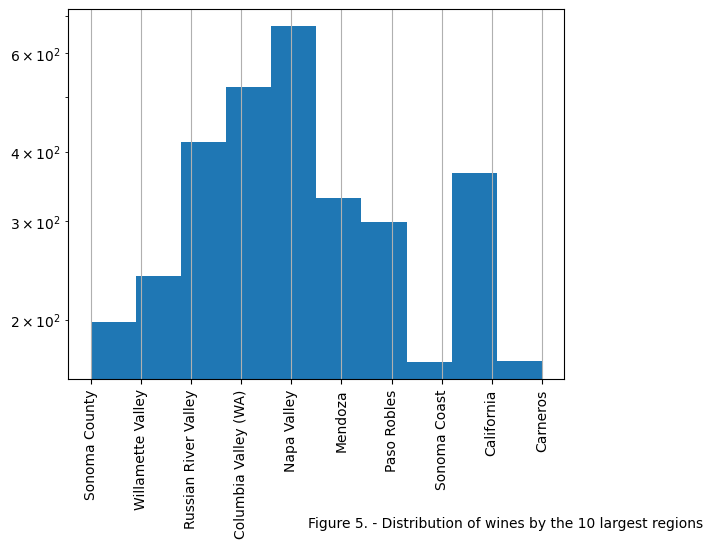

In [32]:
gRegion = df.region_1.value_counts()[:10].index
df[df['region_1'].isin(gRegion)]['region_1'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Figure {num}. - Distribution of wines by the 10 largest regions")
num += 1
plt.show()

In [33]:
print(f"The largest number of wines is represented by producers from the region {df.region_1.value_counts().idxmax()}с.")

The largest number of wines is represented by producers from the region Napa Valleyс.


##### Distribution of wines by the 10 largest wineries.

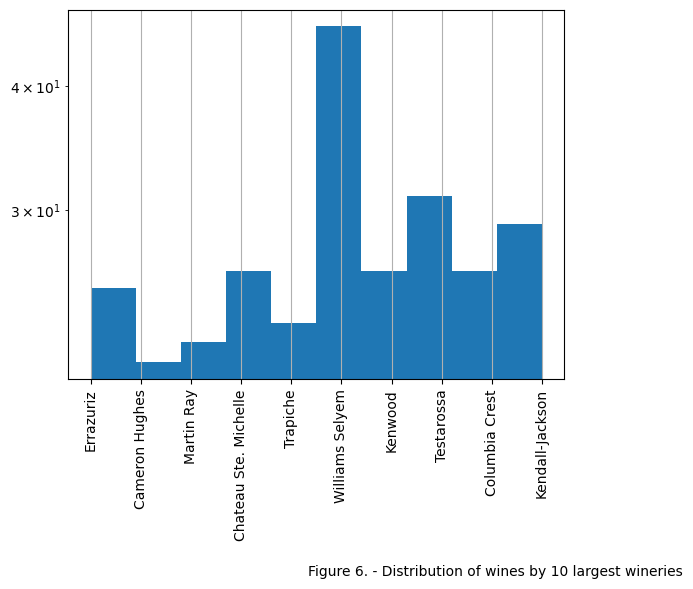

In [34]:
gWinery = df.winery.value_counts()[:10].index
df[df['winery'].isin(gWinery)]['winery'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.3, f"Figure {num}. - Distribution of wines by 10 largest wineries")
num += 1
plt.show()

In [35]:
print(f"The largest number of wines is represented by producers from the winery named {df.winery.value_counts().idxmax()} \
- {round(df.region_1.value_counts()[0]/df.shape[0]*100, 2)}%.")

The largest number of wines is represented by producers from the winery named Williams Selyem - 5.56%.


##### Information about wine prices by country

In [36]:
agg_df = round(df[['country', 'price']].groupby(['country']).agg(maximum = ('price','max'),
                                                  minimum = ('price','min'),
                                                  mean = ('price','mean'),
                                                  number = ('price',len)),2)
agg_df

,maximum,minimum,mean,number
country,,,,
Argentina,215.0,6.0,23.59,536
Australia,550.0,5.0,31.62,466
Austria,89.0,10.0,27.03,111
Brazil,26.0,26.0,26.00,1
Bulgaria,20.0,20.0,20.00,1
Canada,145.0,13.0,39.59,17
Chile,260.0,7.0,20.59,439
Croatia,21.0,14.0,17.50,2
France,2300.0,6.0,50.45,1493


In [37]:
#Integrity check
agg_df.number.sum()==df.shape[0]

True

In [38]:
print(f"The largest number of wines in the dataset is represented by producers from {agg_df['number'].idxmax()}, \
with a price spread from {agg_df.loc[agg_df['number'].idxmax(), 'minimum']} до {agg_df.loc[agg_df['number'].idxmax(), 'maximum']} dollars.")
print(f"The most expensive wine is presented by the manufacturer from {agg_df['maximum'].idxmax()} по цене \
{agg_df['maximum'].max()} dollars.")
print(f"The cheapest wine is presented by producers from {', '.join(agg_df[agg_df['minimum'] == agg_df['minimum'].min()].index)} by price \
{agg_df['minimum'].min()} dollars.")
print(f"Average wine prices range from {agg_df['mean'].min()} dollars for {agg_df['mean'].idxmin()} to {agg_df['mean'].max()} dollars for {agg_df['mean'].idxmax()}.")

The largest number of wines in the dataset is represented by producers from US, with a price spread from 6.0 до 300.0 dollars.
The most expensive wine is presented by the manufacturer from France по цене 2300.0 dollars.
The cheapest wine is presented by producers from Australia, Portugal, Spain by price 5.0 dollars.
Average wine prices range from 11.67 dollars for Romania to 50.45 dollars for France.


##### Information about the best brands of wines.

In [39]:
maxRating = df[['variety', 'points']].sort_values(by = ['points'], ascending=False).head(15)
print("10 сортов вина, которым был присвоен максимальный рейтинг")
maxRating.drop_duplicates(subset=['variety'], keep = 'first')

10 сортов вина, которым был присвоен максимальный рейтинг


,variety,points
5955,Merlot,100
323,Chardonnay,100
9203,Nebbiolo,99
13188,Bordeaux-style Red Blend,99
9990,Portuguese Red,99
2458,Sparkling Blend,98
7169,Pinot Noir,98
15942,Cabernet Sauvignon,98
6363,Sangiovese,98
8545,Champagne Blend,97


##### Information about wine ratings by country and by wine varieties.

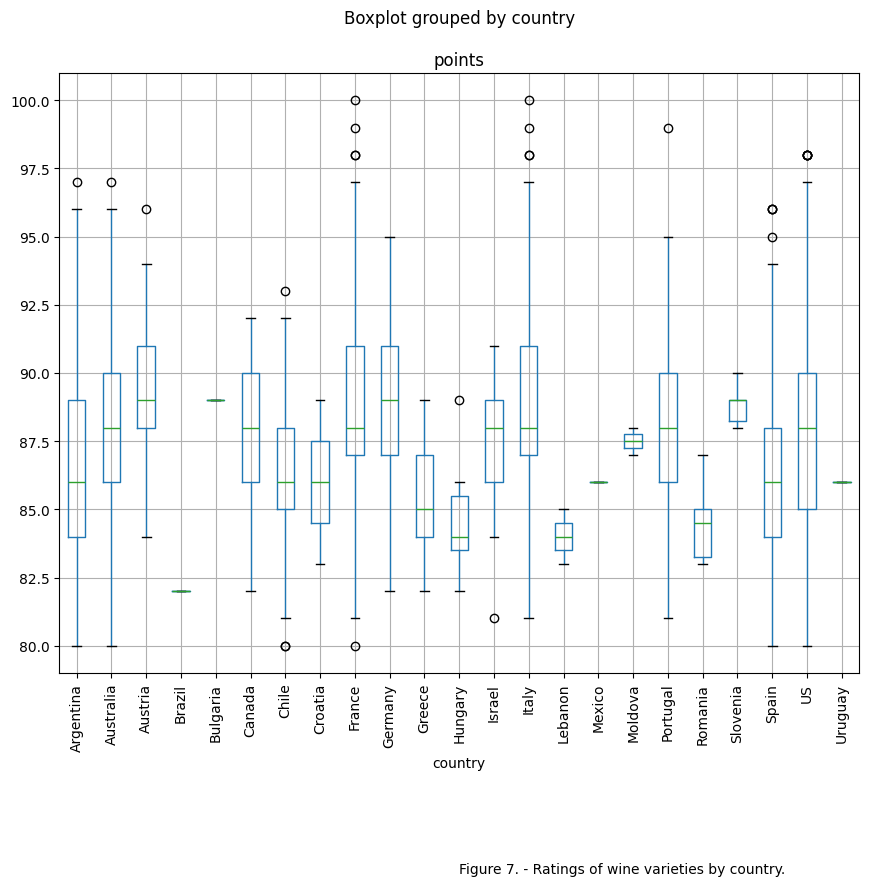

In [40]:
#Boxplot by country
df.boxplot(by='country', column='points', figsize=(10,8), rot = 90)
plt.figtext(0.5, -0.1, f"Figure {num}. - Ratings of wine varieties by country.")
plt.show()
num += 1

In [41]:
print("The largest number of ouliers is represented among the ratings awarded to Italian wines.")
print("Outliers can be recognized as the values of the ratings of Italian wines, greater than 95 and less than 82.5.")
print("On the other hand, wine ratings over 95 are extremely rare in general, which may indicate the uniqueness of these wines.")
print("Median ratings range from 82 to 90.")

The largest number of ouliers is represented among the ratings awarded to Italian wines.
Outliers can be recognized as the values of the ratings of Italian wines, greater than 95 and less than 82.5.
On the other hand, wine ratings over 95 are extremely rare in general, which may indicate the uniqueness of these wines.
Median ratings range from 82 to 90.


In [42]:
agg_df = round(df[['country', 'points']].groupby(['country']).agg(median = ('points','median')),2).unstack(level = -1)

In [43]:
agg_df[agg_df == agg_df.max()]

        country 
median  Austria     89.0
        Bulgaria    89.0
        Germany     89.0
        Slovenia    89.0
dtype: float64

In [44]:
agg_df[agg_df == agg_df.min()]

        country
median  Brazil     82.0
dtype: float64

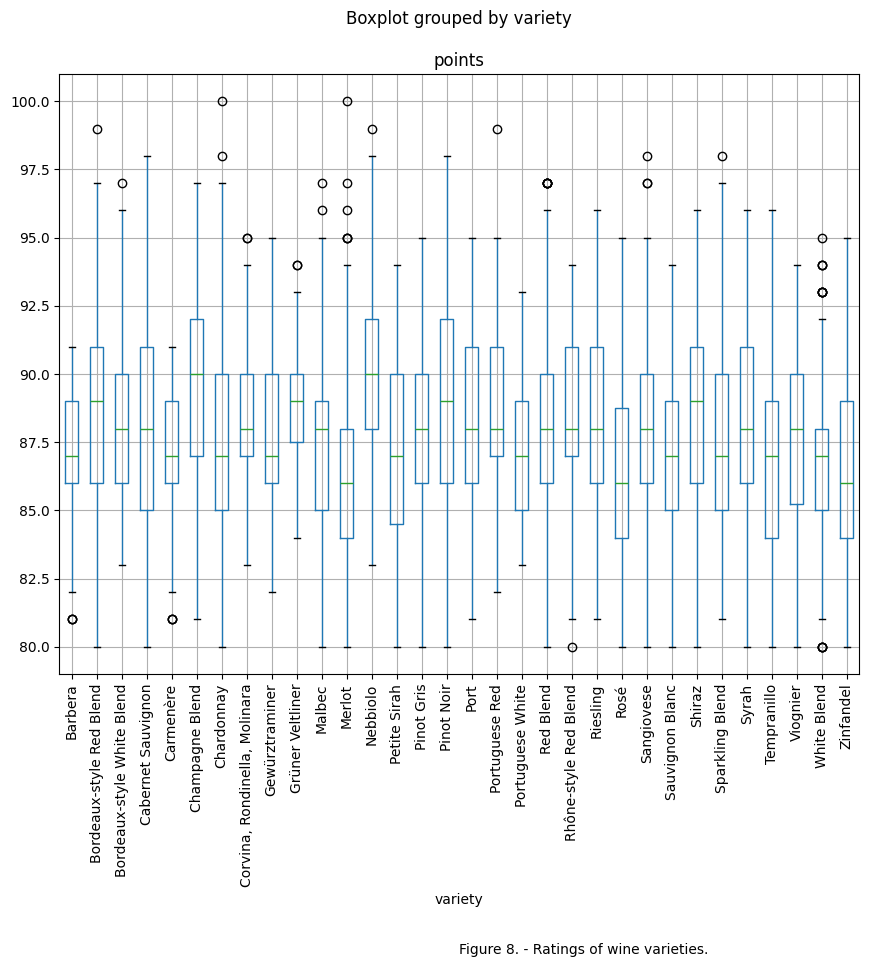

In [45]:
#Boxplot by wine varieties
df.boxplot(by='variety', column='points', figsize=(10,8), rot = 90)
plt.figtext(0.5, -0.2, f"Figure {num}. - Ratings of wine varieties.")
plt.show()
num += 1

In [46]:
agg_df = round(df[['variety', 'points']].groupby(['variety']).agg(median = ('points','median')),2).unstack(level = -1)

In [47]:
agg_df[agg_df == agg_df.max()]

        variety        
median  Champagne Blend    90.0
        Nebbiolo           90.0
dtype: float64

In [48]:
agg_df[agg_df == agg_df.min()]

        variety  
median  Merlot       86.0
        Rosé         86.0
        Zinfandel    86.0
dtype: float64

In [49]:
print("The largest number of emissions are represented among the ratings awarded to the Merlo variety.")
print("Emissions for this variety can be recognized as values of ratings greater than 95.")
print("On the other hand, wine ratings over 95 are extremely rare in general, which may indicate the uniqueness of these wines.")
print("Median ratings range from 86 to 90.")
print ("A narrower range of medians for aggregation by wine varieties compared to the range of medians for aggregation by")
print("country, may indicate that the grape variety is more decisive for the wine than the country of its origin.")

The largest number of emissions are represented among the ratings awarded to the Merlo variety.
Emissions for this variety can be recognized as values of ratings greater than 95.
On the other hand, wine ratings over 95 are extremely rare in general, which may indicate the uniqueness of these wines.
Median ratings range from 86 to 90.
A narrower range of medians for aggregation by wine varieties compared to the range of medians for aggregation by
country, may indicate that the grape variety is more decisive for the wine than the country of its origin.


##### The impact of reviews on prices by country.

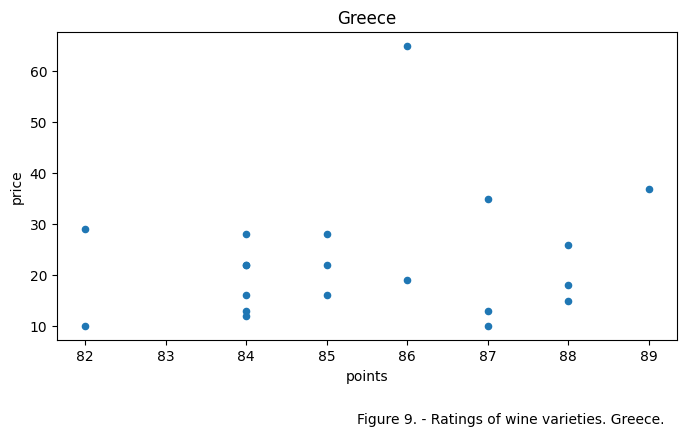

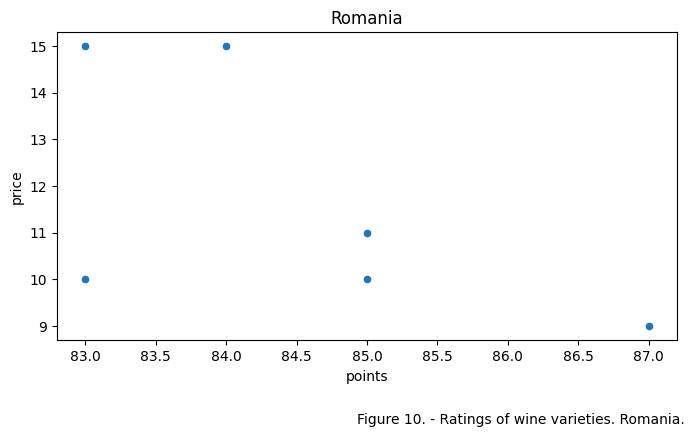

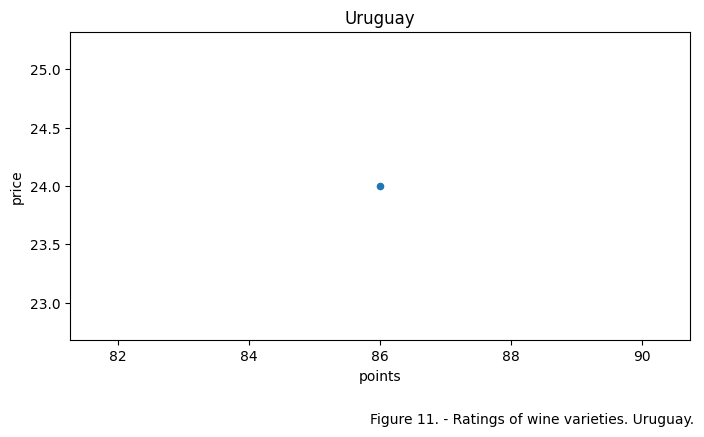

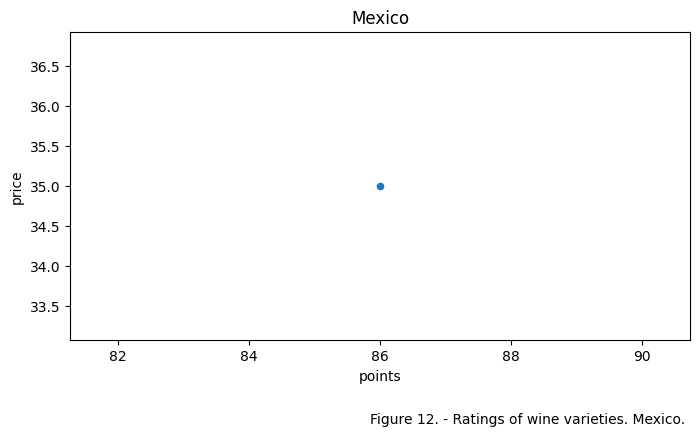

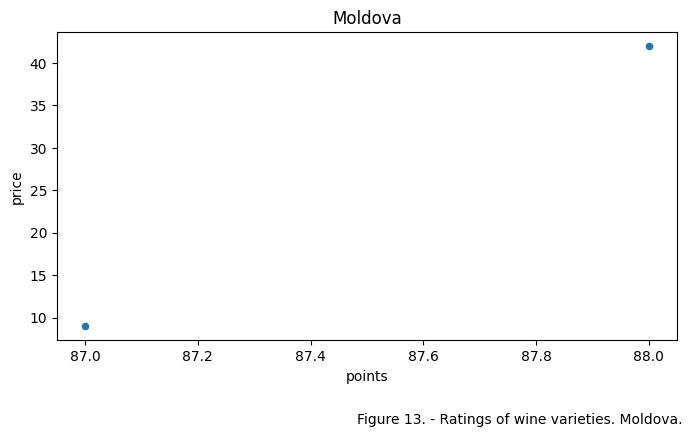

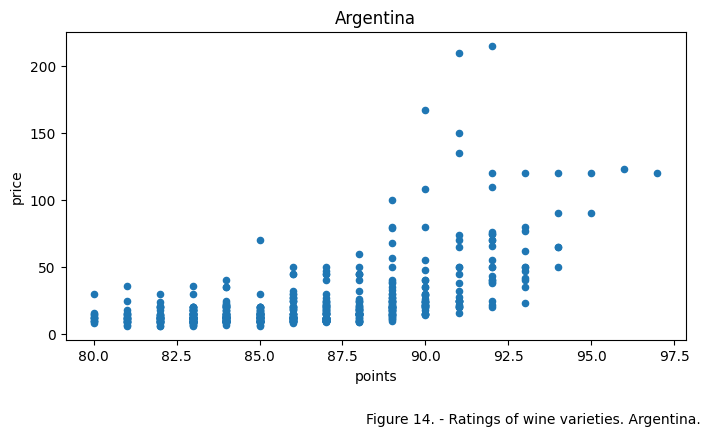

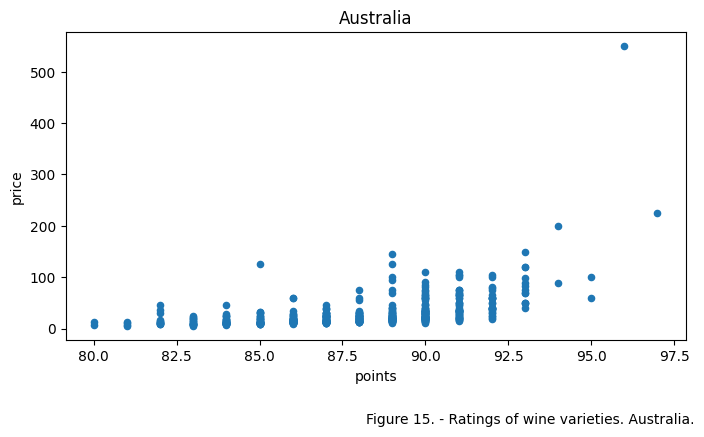

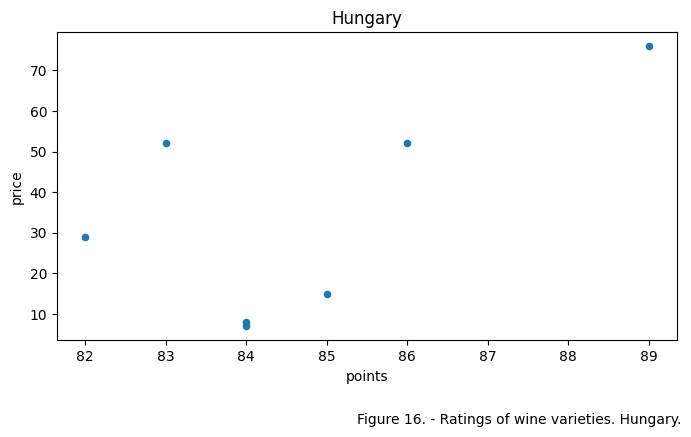

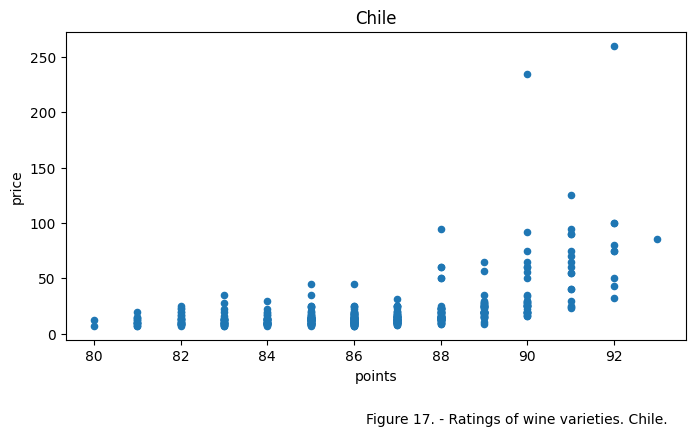

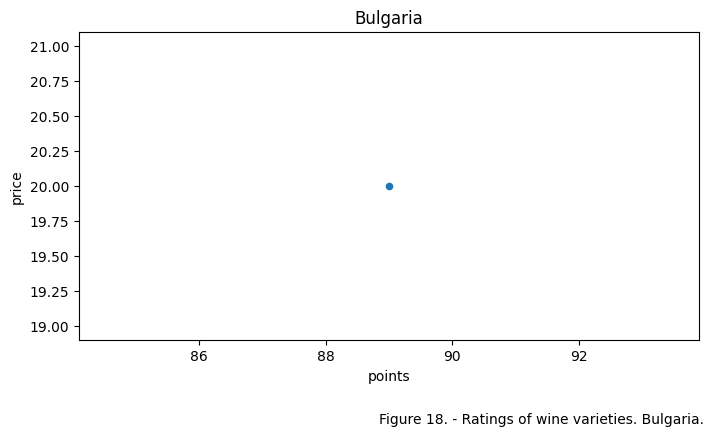

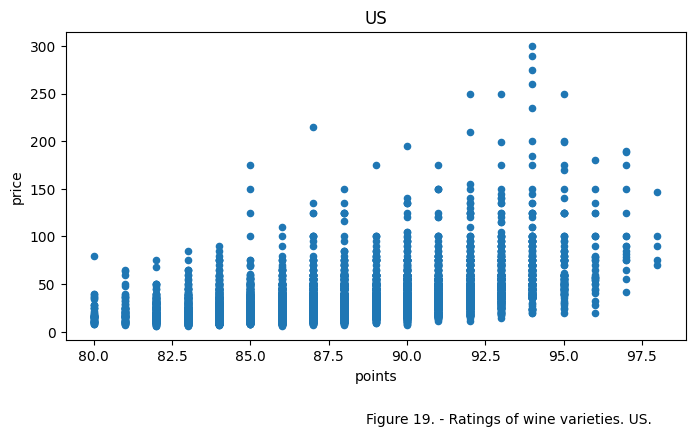

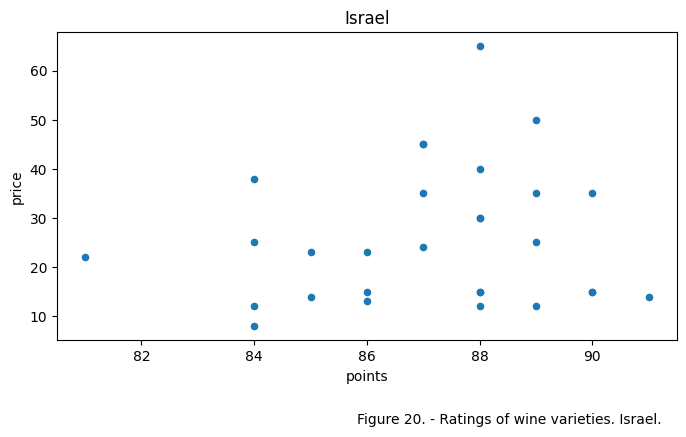

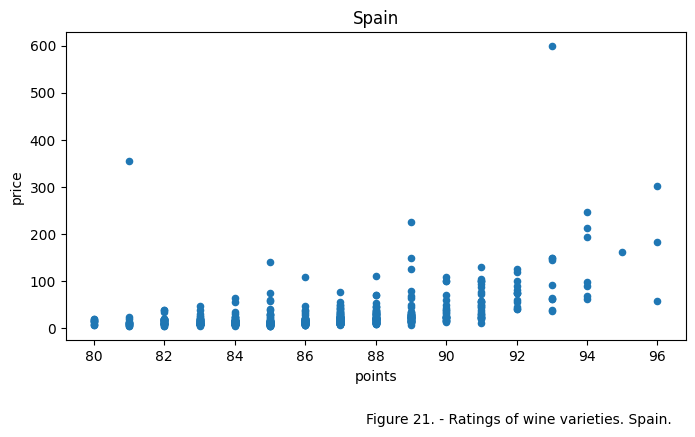

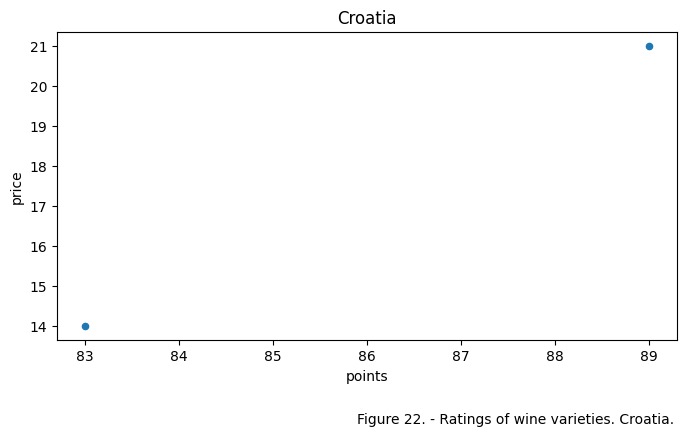

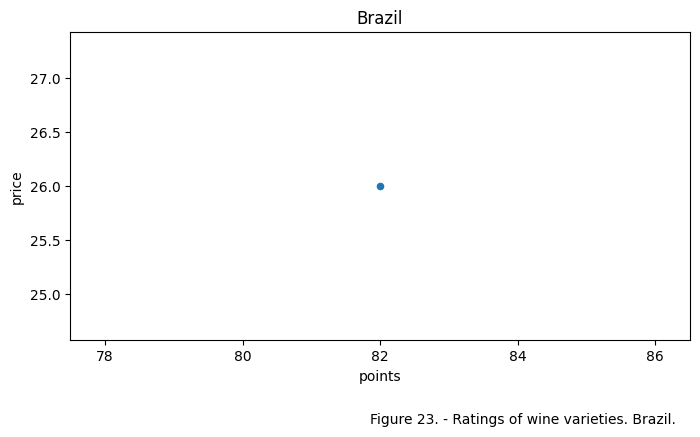

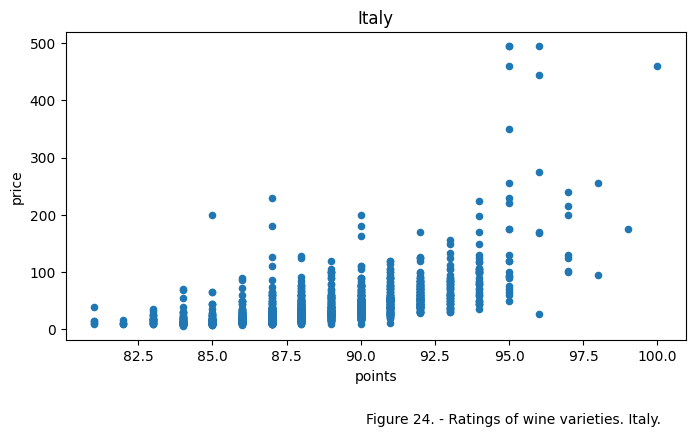

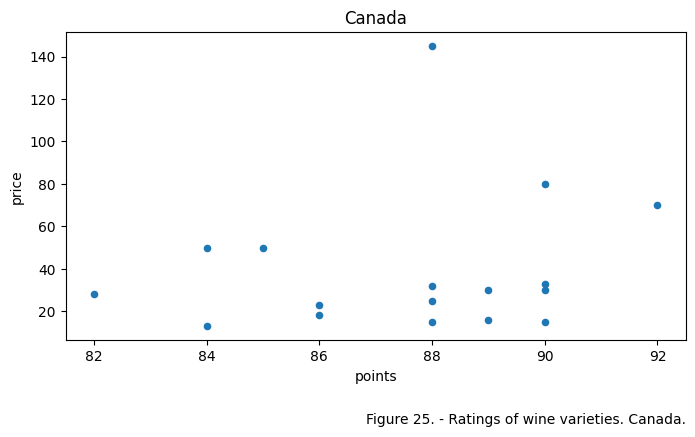

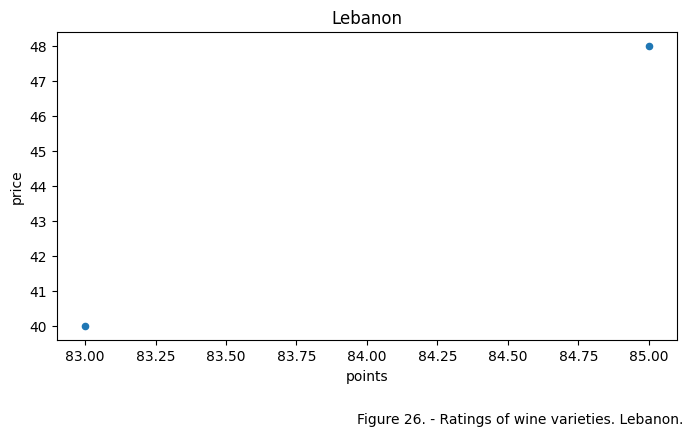

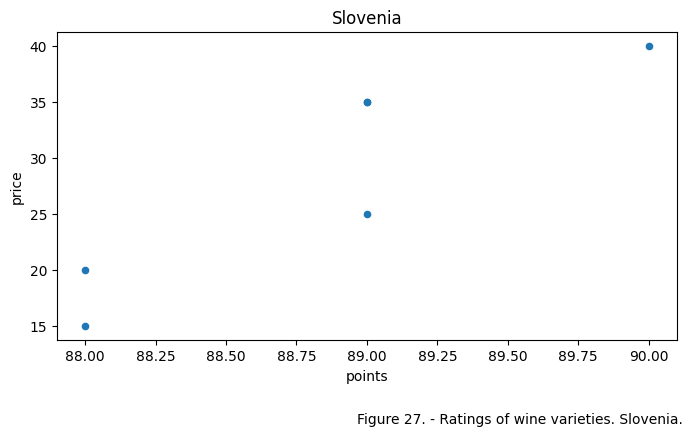

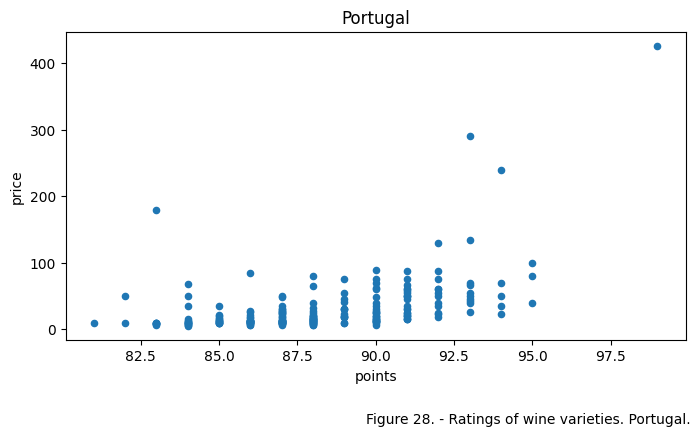

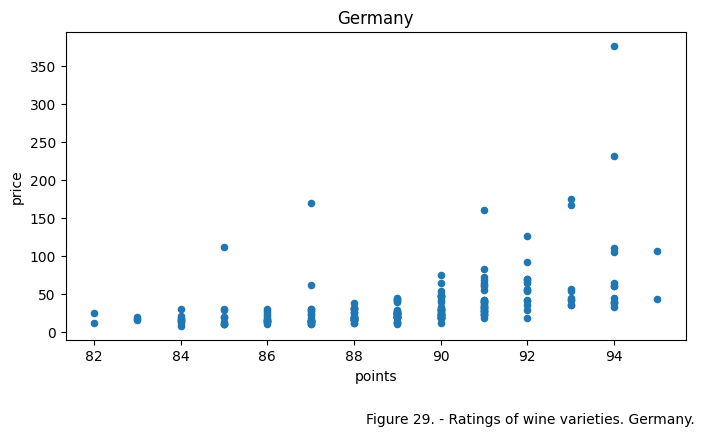

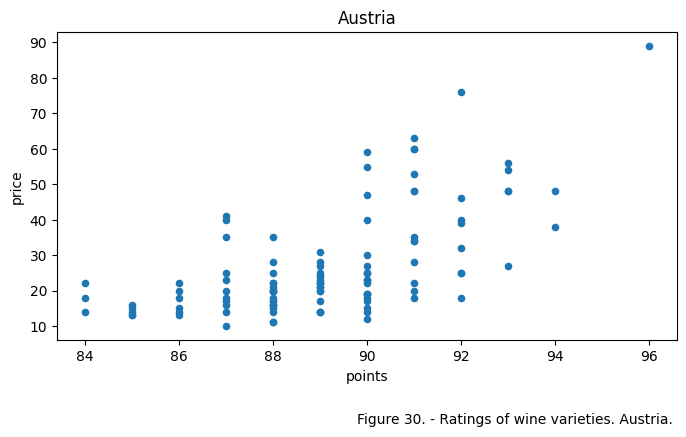

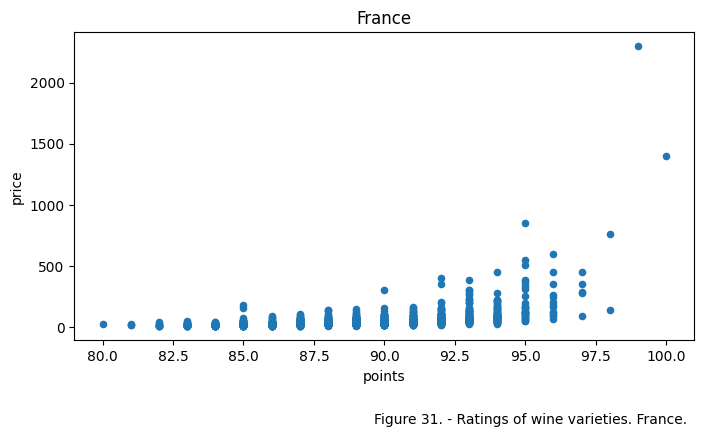

In [50]:
for i in set(df['country']):
    df[df['country']==i][['price','points']].plot(x='points', y='price', title=i, kind='scatter', figsize=(8,4))
    plt.figtext(0.5, -0.1, f"Figure {num}. - Ratings of wine varieties. {i}.")
    plt.show()
    num += 1

In [51]:
print("In general, according to country charts, it can be assumed that reviews are better for more expensive wines.")

In general, according to country charts, it can be assumed that reviews are better for more expensive wines.


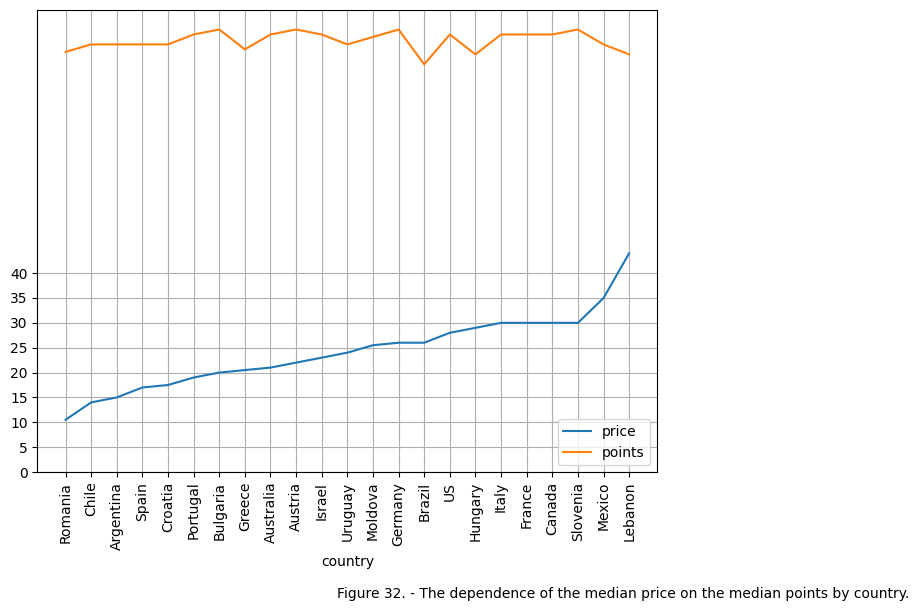

In [52]:
median_price_points_df = df[['country', 'price', 'points']].groupby(['country']).agg('median').sort_values('price')
median_price_points_df.plot(figsize=(8,6), grid=True)
plt.xticks(rotation=90)
plt.xticks(range(0,len(median_price_points_df.index)), median_price_points_df.index)
plt.yticks(range(0,median_price_points_df.max()[0].astype(int)+1, 5))
plt.figtext(0.5, -0.1, f"Figure {num}. - The dependence of the median price on the median points by country.")
plt.show()
num += 1

In [53]:
print("There is a trend that is characterized by an increase in the median price and the constancy of the median rating.")
print ("When comparing aggregated values across countries, both for more expensive Italian wines and for \
cheaper Bulgarian wines, the median rating is stable, which can debunk the myth of elite and \
expensive wines from Italy.")
print("When comparing the median values of reviews and prices, there is a sharp peak for Turkey.\n \
Considering that the median estimates on average range from 80 to 90, and the median prices range \n \
from 5 to 50, for Turkey there is a sharp peak at the level of 120.")

There is a trend that is characterized by an increase in the median price and the constancy of the median rating.
When comparing aggregated values across countries, both for more expensive Italian wines and for cheaper Bulgarian wines, the median rating is stable, which can debunk the myth of elite and expensive wines from Italy.
When comparing the median values of reviews and prices, there is a sharp peak for Turkey.
 Considering that the median estimates on average range from 80 to 90, and the median prices range 
 from 5 to 50, for Turkey there is a sharp peak at the level of 120.


In [54]:
df[df.country == 'Turkey'].shape

(0, 10)

Considering that only one brand of wine with a price of 120 is presented for Turkey, it makes sense to exclude Turkey from the comparison in order to compare prices and reviews by country.


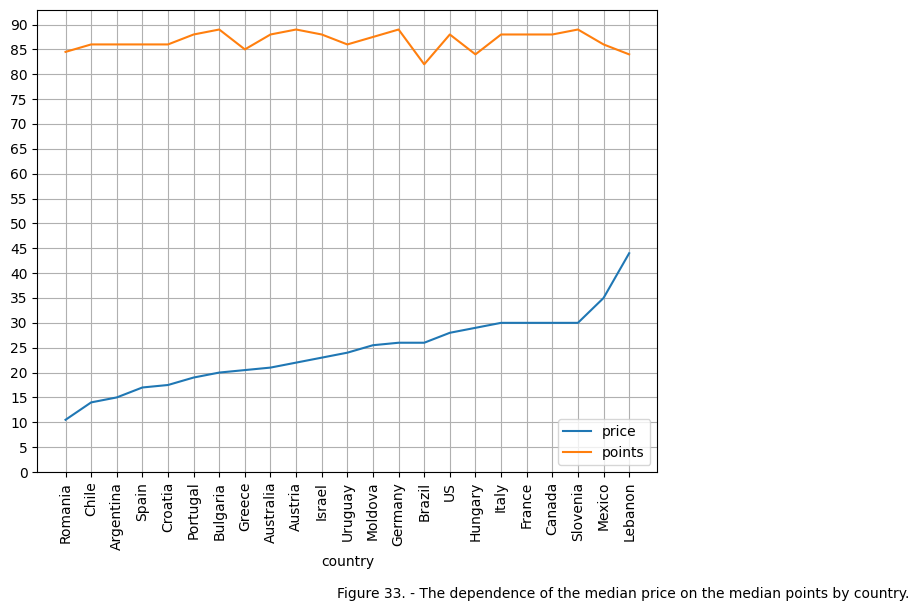

In [55]:
print("Considering that only one brand of wine with a price of 120 is presented for Turkey, it makes sense to \
exclude Turkey from the comparison in order to compare prices and reviews by country.")
median_price_points_df = df[['country', 'price', 'points']][df.country != 'Turkey'].groupby(['country']).agg('median').sort_values('price')
median_price_points_df.plot(figsize=(8,6), grid=True)
plt.xticks(rotation=90)
plt.xticks(range(0,len(median_price_points_df.index)), median_price_points_df.index)
plt.yticks(range(0,median_price_points_df.max()[0].astype(int)+50, 5))
plt.figtext(0.5, -0.1, f"Figure {num}. - The dependence of the median price on the median points by country.")
plt.show()
num += 1

##### Scatter plot and the correlation between ratings and prices.

In general, we can talk about a positive correlation between ratings and prices


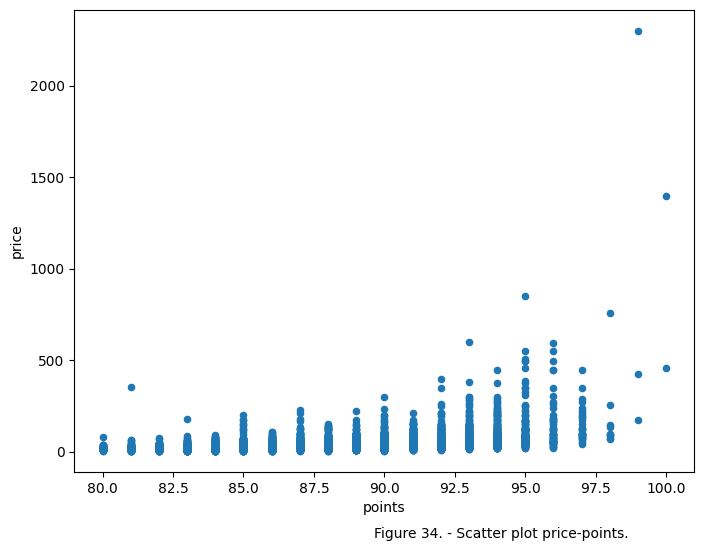

In [56]:
print("In general, we can talk about a positive correlation between ratings and prices")
df[['points', 'price']].plot(x='points', y='price', kind='scatter', figsize=(8,6))
plt.figtext(0.5, 0, f"Figure {num}. - Scatter plot price-points.")

plt.show()
num += 1

In [57]:
df_cleaned = df[df.country != 'Turkey']
corr_price_points = df_cleaned[['country', 'price', 'points']].groupby(['country']).corr(method='pearson')
corr_price_points_new = corr_price_points.unstack()['price','points']
corr_price_points_new

country
Argentina    0.561913
Australia    0.490529
Austria      0.624784
Brazil            NaN
Bulgaria          NaN
Canada       0.186154
Chile        0.485189
Croatia      1.000000
France       0.455014
Germany      0.448843
Greece       0.184963
Hungary      0.600607
Israel       0.131573
Italy        0.580062
Lebanon      1.000000
Mexico            NaN
Moldova      1.000000
Portugal     0.482206
Romania     -0.595306
Slovenia     0.900755
Spain        0.458187
US           0.495766
Uruguay           NaN
Name: (price, points), dtype: float64

In [58]:
print("There are omissions in calculating the correlation by country:")
corr_na = corr_price_points_new[corr_price_points_new.isna()].index.to_list()
corr_na

There are omissions in calculating the correlation by country:


['Brazil', 'Bulgaria', 'Mexico', 'Uruguay']

In [59]:
df[df.country.isin(corr_na)].index.value_counts()

3572     1
4137     1
9151     1
18654    1
Name: count, dtype: int64

In [60]:
print("The wines for these countries are present in a single copy, and therefore the correlation cannot be calculated, let's exclude these countries from the answer.")

The wines for these countries are present in a single copy, and therefore the correlation cannot be calculated, let's exclude these countries from the answer.


In [61]:
print("For the wines of the following countries, there is a positive and rather strong 'more than 0.5' correlation of rating and price.")
corr_price_points_new[~corr_price_points_new.isna() & (corr_price_points_new > .5)]

For the wines of the following countries, there is a positive and rather strong 'more than 0.5' correlation of rating and price.


country
Argentina    0.561913
Austria      0.624784
Croatia      1.000000
Hungary      0.600607
Italy        0.580062
Lebanon      1.000000
Moldova      1.000000
Slovenia     0.900755
Name: (price, points), dtype: float64

In [62]:
print("For the wines of the following countries, there is a negative correlation of rating and price:")
corr_price_points_new[~corr_price_points_new.isna() & (corr_price_points_new < 0)]

For the wines of the following countries, there is a negative correlation of rating and price:


country
Romania   -0.595306
Name: (price, points), dtype: float64

In [63]:
print("For Romania, the expectations from the price increase were not justified.")
df[df.country.isin(['Romania'])]

For Romania, the expectations from the price increase were not justified.


,country,description,points,price,province,region_1,variety,winery,color,part_world
5180,Romania,"Dense and syrupy like black cherry juice, this...",83,10.0,Dealurile Munteniei,Dealu Mare,Pinot Noir,Dreamer,red,Europe
8338,Romania,"Despite Romanian labeling standards, this frui...",87,9.0,Murfatlar,Murfatlar,Pinot Noir,Murfatlar,red,Europe
8504,Romania,Fresh red-cherry and strawberry flavors are vi...,85,11.0,Murfatlar,Murfatlar,Cabernet Sauvignon,Murfatlar,red,Europe
12434,Romania,Nice fruit aromas of blueberry and plum mingle...,84,15.0,Dealu Mare,Dealu Mare,Red Blend,Byzantium,red,Europe
16563,Romania,"Chunky and on the verge of plump, this wine ha...",83,15.0,Dealu Mare,Dealu Mare,Cabernet Sauvignon,Byzantium,red,Europe
19564,Romania,Although the nose on this medium-bodied Romani...,85,10.0,Dealu Mare,Dealu Mare,Red Blend,Byzantium,red,Europe


##### The general distribution of wines by country.

In [64]:
group = df[['country', 'variety', 'points']].groupby(['country', 'variety']).agg(len)
most_wide_spread = group[group['points'] > 1000]
most_wide_spread.unstack()

points           
variety Cabernet Sauvignon Pinot Noir
country                              
US                    1055       1241

In [65]:
a = most_wide_spread.unstack(level=0).index.to_list()
print(f"The most common varieties of wine are {', '.join(a)}, produced by {most_wide_spread.unstack().index[0]}.")

The most common varieties of wine are Cabernet Sauvignon, Pinot Noir, produced by US.


##### Regions (province) producing wines with the best ratings

In [66]:
best =  df[['province', 'points', 'price']].sort_values('points', ascending = False).head(5).province.to_list()
print(f"The best rating is given to the wines of the regions {', '.join(best)}.")

The best rating is given to the wines of the regions Tuscany, Champagne, Piedmont, Bordeaux, Douro.


In [67]:
max_v = df[['province', 'points', 'price']][df['points'].isin([99,100])].max().values[2]
min_v = df[['province', 'points', 'price']][df['points'].isin([99,100])].min().values[2]
m = round(max_v/min_v,2)
print(f"The cost of the cheapest and most expensive of the highly valued wines varies by {m} times.")
print("This does not indicate that more expensive wines are priced higher.")

The cost of the cheapest and most expensive of the highly valued wines varies by 13.14 times.
This does not indicate that more expensive wines are priced higher.


##### Parts of the world producing higher-rated wines

In [68]:
bestPartWorld = df[['part_world', 'points']][df['points'] == 100]
a = list(set(bestPartWorld['part_world']))[0]
print(f"Wines with a higher rating are produced in {a}.")

Wines with a higher rating are produced in Europe.


##### Описание вин с наивысшим рейтингом

In [69]:
bestDescription = df1[['description', 'points']][df1['points'] == 100]
bestDescription
print("The wines with the highest rating have the following descriptions:")
for description in bestDescription['description']:
    print(description)
    print("\n")

The wines with the highest rating have the following descriptions:
A wine that has created its own universe. It has a unique, special softness that allies with the total purity that comes from a small, enclosed single vineyard. The fruit is almost irrelevant here, because it comes as part of a much deeper complexity. This is a great wine, at the summit of Champagne, a sublime, unforgettable experience.


A perfect wine from a classic vintage, the 2007 Masseto (100% Merlot from a 17-acre vineyard of the same name) opens with an unabashedly opulent bouquet of delicious blackberry, cherry, chocolate, vanilla, exotic spice and cinnamon. Masseto excels both in terms of quality of fruit and winemaking and delivers plush, velvety tannins and an extra long, supple finish. It will make a special and valuable collection to your cellar.


Impossibly aromatic. Hard to imagine greater claret perfume. Shows the most refined mingling of smoky oak, cassis, cherries, roasted coconut macaroon, cocoa puf

##### Wine varieties with the highest rating

In [70]:
bestDescription = df[['variety', 'points']][df['points'] == 100]
bestDescription = bestDescription['variety'].to_list()
print(f"The most highly appreciated varieties: {', '.join(bestDescription)}.")

The most highly appreciated varieties: Chardonnay, Merlot.


##### Prices for wines with the highest rating by country

In [71]:
group = df[['country','points']].groupby('country').agg(max)
g_pair = group.index.map(str) + group['points'].map(str)
g_pair = [i for i in g_pair.values]
df['combine'] = df['country'].map(str) + df['points'].map(str)
best_wine = df[df['combine'].isin(g_pair)]
best_wine['country'].value_counts()

country
US           5
Spain        3
Germany      2
Austria      1
Romania      1
Mexico       1
Slovenia     1
Israel       1
Moldova      1
Portugal     1
Brazil       1
Chile        1
Italy        1
Canada       1
France       1
Greece       1
Hungary      1
Bulgaria     1
Uruguay      1
Australia    1
Lebanon      1
Croatia      1
Argentina    1
Name: count, dtype: int64

In [72]:
print("Considering that for some countries there may be several wines with a high rating, it is advisable to carry out aggregation.")

Considering that for some countries there may be several wines with a high rating, it is advisable to carry out aggregation.


In [73]:
print("The average cost of the wine with the highest rating by country is equal to:")
round(best_wine[['country','price']].groupby('country').agg('mean'),2)

The average cost of the wine with the highest rating by country is equal to:


,price
country,
Argentina,120.00
Australia,225.00
Austria,89.00
Brazil,26.00
Bulgaria,20.00
Canada,70.00
Chile,86.00
Croatia,21.00
France,1400.00


##### Wineries producing the most expensive/highly rated wines

In [76]:
wineriesByPoints = df[['winery', 'points']][df['points'] == 100]
wineriesByPrice = df[['winery', 'price']][df['price'] == df['price'].max()]
a = ", ".join(pd.concat([wineriesByPrice['winery'],wineriesByPoints['winery']]).values)
print(f"Wineries producing the most expensive/highly rated wines: {a}")

Wineries producing the most expensive/highly rated wines: Château Latour, Krug, Tenuta dell'Ornellaia


##### Винодельни/регионы/страны производящие вина с самым низким рейтингом

In [78]:
df[['winery','country', 'region_1', 'points']][df['points']==df['points'].min()]

,winery,country,region_1,points
219,Congress Springs,US,California,80
254,Cesar Lucendo,Spain,Vino de la Tierra de Castilla,80
429,Michel Torino,Argentina,Salta,80
449,Desert Wind,US,Wahluke Slope,80
699,Mosby,US,Santa Barbara County,80
...,...,...,...,...
18934,Bogle,US,California,80
19070,Merriam,US,Russian River Valley,80
19389,Gary Farrell,US,Dry Creek Valley,80
19639,Red Knot,Australia,South Australia,80


##### Analysis of Chardonnay wine

In [79]:

Chardonnay = df[df['variety']=='Chardonnay']['country'].value_counts()
CharCountry = Chardonnay[Chardonnay > 200].index.to_list()
print(f"The main countries producing Chardonnay wine: {', '.join(CharCountry)}.")
CharReg = df[['region_1', 'country']][(df['variety'] == 'Chardonnay') & df['country'].isin(CharCountry)]['region_1'].value_counts()

CharReg = CharReg[CharReg > 50].index.to_list()
df[['region_1', 'country']][(df['variety'] == 'Chardonnay') & df['region_1'].isin(CharReg)]
print(f"Main production regions: {', '.join(CharReg)}.")


The main countries producing Chardonnay wine: US, France.
Main production regions: Russian River Valley, Napa Valley, Carneros, California, Columbia Valley (WA), Chablis.


In [80]:
char = df[(df['variety'] == 'Chardonnay') & df['region_1'].isin(CharReg)]
char.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world,combine
83,US,This finest selection Chardonnay is a blend of...,90,30.0,California,Russian River Valley,Chardonnay,De Loach,white,North America,US90
236,US,"Not one of the better Ethos reserves, this is ...",87,25.0,Washington,Columbia Valley (WA),Chardonnay,Chateau Ste. Michelle,white,North America,US87
249,US,"Stainless- steel fermented, this Chard comes f...",87,18.0,California,Russian River Valley,Chardonnay,Balletto,white,North America,US87
307,US,The golf legend lends his name to this everyda...,84,15.0,California,California,Chardonnay,Arnold Palmer,white,North America,US84
361,US,The influence of sur lie aging marks this wine...,93,41.0,California,Russian River Valley,Chardonnay,Gary Farrell,white,North America,US93


In [81]:
print(f"Chardonnay is a wine of color {char.color.unique()[0]}.")

Chardonnay is a wine of color white.


The main region of Chardonnay production - Russian River Valley.


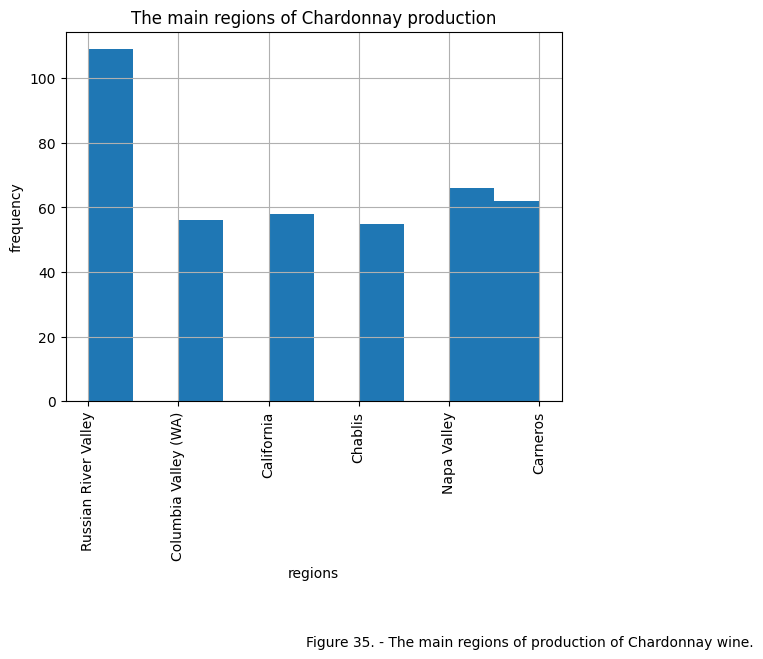

In [82]:
print(f"The main region of Chardonnay production - {char['region_1'].value_counts().idxmax()}.")
char['region_1'].hist(xrot=90)
plt.title("The main regions of Chardonnay production")
plt.xlabel('regions')
plt.ylabel('frequency')
plt.figtext(0.5, -0.4, f"Figure {num}. - The main regions of production of Chardonnay wine.")
plt.show()
num += 1

The most common price of a bottle of Chardonnay from the main production regions is 20.


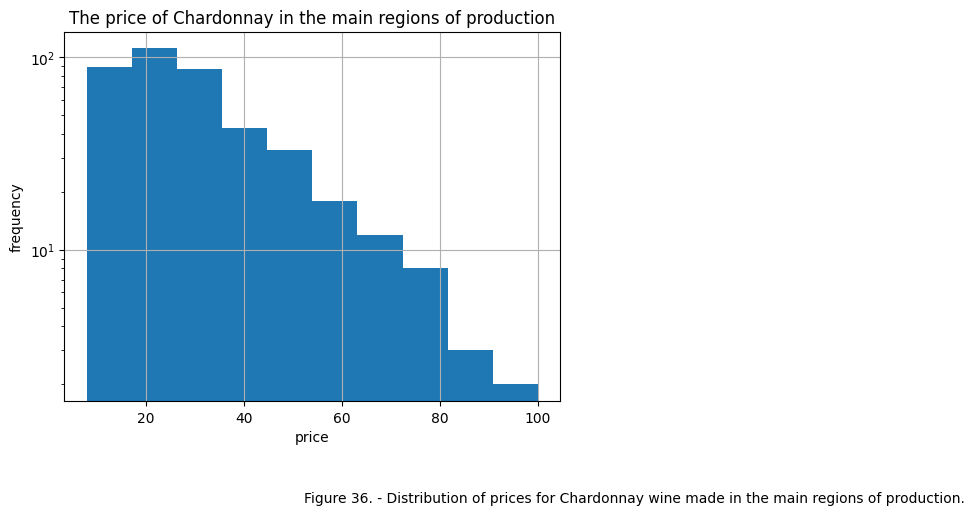

In [83]:
char['price'].hist(bins=10)
plt.title("The price of Chardonnay in the main regions of production")
plt.xlabel('price')
plt.ylabel('frequency')
plt.yscale('log')
print("The most common price of a bottle of Chardonnay from the main production regions is 20.")
plt.figtext(0.5, -0.1, f"Figure {num}. - Distribution of prices for Chardonnay wine made in the main regions of production.")
plt.show()
num += 1

In [84]:
a = char[char['price'] == char['price'].max()]['winery'].to_list()[0]
print(f"The most expensive Chardonnay of the main regions of production is produced at the winery {a} at a price of $ {char['price'].max()}.")

The most expensive Chardonnay of the main regions of production is produced at the winery Domaine Laroche at a price of $ 100.0.


The most frequent rating of Chardonnay wines is 87 points


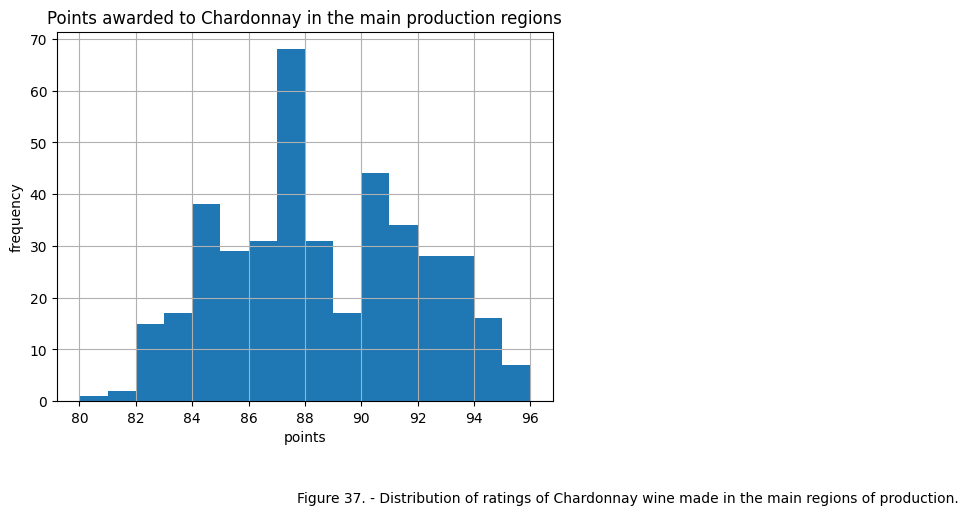

In [85]:
print("The most frequent rating of Chardonnay wines is 87 points")
char['points'].hist(bins=16)
plt.title("Points awarded to Chardonnay in the main production regions")
plt.xlabel('points')
plt.ylabel('frequency')
plt.figtext(0.5, -0.1, f"Figure {num}. - Distribution of ratings of Chardonnay wine made in the main regions of production.")
plt.show()
num += 1

In [86]:
char['points'].value_counts()

points
87    68
90    44
84    38
91    34
88    31
86    31
85    29
92    28
93    28
83    17
89    17
94    16
82    15
95     4
96     3
81     2
80     1
Name: count, dtype: int64

Let's study the decline in estimates at the level of 89-90.

In [87]:
print(f"The price of these wines is ${char[char['points']==89]['price'].median()} is quite rare.")

The price of these wines is $29.0 is quite rare.


In [88]:
win89 = set(char[char['points']==89]['winery'])
num89 = len(win89)

winIntersect = win89 & set(char[(char['points'] < 89) | (char['points'] > 89)]['winery'])
numItersect = len(winIntersect)

a = round((num89 - numItersect)/num89*100)
print(f"{a}%  of wineries that produce Chardonnay with a score of 89 points are not represented among wine producers with scores above and below 89 points. \n")
print(f"Basic assumption: wineries {win89 - winIntersect} are new, previously unknown to critics or undisclosed wineries/brands.")

41%  of wineries that produce Chardonnay with a score of 89 points are not represented among wine producers with scores above and below 89 points. 

Basic assumption: wineries {'Gordon Brothers', 'Laird', 'Mahoney', 'Porter Family Vineyards', 'Romain Bouchard', 'Barnard Griffin', 'Château Souverain'} are new, previously unknown to critics or undisclosed wineries/brands.


In [89]:
df[df['winery'].isin(list(win89 - winIntersect))]['country'].drop_duplicates()

4817        US
6287    France
Name: country, dtype: object

In [90]:
df[df['winery'].isin(list(win89 - winIntersect))]['region_1'].drop_duplicates()

4817                 Carneros
5493     Columbia Valley (WA)
6287                  Chablis
6364     Russian River Valley
12223        Alexander Valley
12424            Red Mountain
16764             Napa Valley
Name: region_1, dtype: object

In [91]:
print("These wineries with an 89 rating are represented only in France and the USA, only in the main production regions.")

These wineries with an 89 rating are represented only in France and the USA, only in the main production regions.


### <a id="3">3. Portrait of a wine reviewer </a>

For the purposes of forming a portrait of a wine reviewer, this dataset can be interpreted as a single array formed by 1 wine reviewer for a long time, in this case, the user's preferences: country, price distribution, distribution of wines by colors, estimates and price are presented in the final work in general.

Nevertheless, it can be assumed that this dataset is based on reviews from different users and, using classification methods, try to group the dataset by description - the description feature. The main assumption is that each critic has his own vocabulary and style of writing reviews.

To do this, group the attribute by topic using the Gensim library. Gensim is an open source Python library written by Radim Rehurek, which is used for unsupervised thematic modeling and natural language processing (NLP). It is designed to extract semantic topics from documents.

In [92]:
from gensim import corpora
from gensim.models import Phrases, phrases
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation

In [93]:
descs = df['description']
stop_words = set(stopwords.words('english')) 
stop_words = stop_words.union(set(punctuation)) 
stop_words.update(["\'s", "n't"])

Let's bring the words in the description description to their basic form (lemmatization).

In [94]:
lemmatizer = WordNetLemmatizer()
texts = []
for desc in descs:
    text = [lemmatizer.lemmatize(word) for word in word_tokenize(desc.lower()) if word not in stop_words]
    texts.append(text)

In [95]:
print(texts[100])

['blend', '60', 'merlot', '40', 'cabernet', 'sauvignon', 'sleek', 'wine', 'open', 'aroma', 'red', 'currant', 'bell', 'pepper', 'herb', 'juicy', 'palate', 'note', 'white', 'pepper', 'clove', 'add', 'interest', 'crushed', 'strawberry', 'cassis', 'tangy', 'acidity', 'polished', 'tannin', 'provide', 'framework']


let's break the descriptions into bigrams and trigrams, groups of 2 or three sequences of words.

In [96]:
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)
# threshold - the threshold value of the evaluation for the definition of the phrase
# min_count - the threshold value of the frequency of words and bigrams below which words are not considered in principle
bigram_mod = phrases.Phraser(bigram) 
trigram_mod = phrases.Phraser(trigram)

In [97]:
 print(trigram_mod[bigram_mod[texts[100]]])

['blend', '60', 'merlot', '40', 'cabernet_sauvignon', 'sleek', 'wine', 'open', 'aroma', 'red', 'currant', 'bell_pepper', 'herb', 'juicy', 'palate', 'note', 'white', 'pepper', 'clove', 'add_interest', 'crushed', 'strawberry', 'cassis', 'tangy', 'acidity', 'polished', 'tannin', 'provide_framework']


provide_framework - was defined as a word sequence of the words 'provide' and 'network'.

Переопределим список описаний с учетом биграмм и триграмм. Также подготовим специальный словарь для библиотеки Gensim, присваивающий идентификатор слову, биграмму и триграмму.

In [98]:
len(texts)

12071

In [99]:
texts = [trigram_mod[bigram_mod[text]] for text in texts]
id2word = corpora.Dictionary(texts)

We will prepare "bags of words" for each description, indicating the frequency of use of each word.

In [100]:
from gensim.models import LdaModel
corpus = [id2word.doc2bow(text) for text in texts] 

In [101]:
#Let's fix random_state value
rand_state = 42

In [102]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """
    let's calculate the coherence of the topics
    Parameters:
    ----------
    dictionary : Gensim Dictionary
    corpus : Gensim corpus consisting of "bags of words"
    texts : list of input descriptions
    limit : Maximum number of topics
    Output:
    -------
    model_list : List of LDA models for topics
    coherent values : coherence values corresponding to a given number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         num_topics=num_topics, 
                         id2word=id2word,
                         random_state=rand_state) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Let's check the coherence values for the number of topics starting from 2 to 38 inclusive with an interval of 6.

In [103]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=texts, 
                                                        limit=40, 
                                                        start=2, 
                                                        step=6)
coherence_values

[0.27210587631683936,
 0.32580615510165156,
 0.35029115281180967,
 0.3571778805710612,
 0.3510090547017317,
 0.34298737540324187,
 0.3486166734645092]

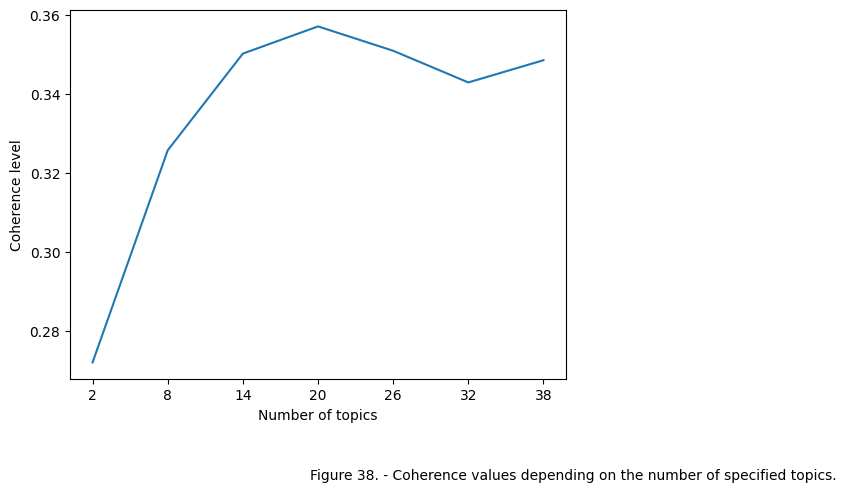

In [104]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values) 
plt.xlabel("Number of topics") 
plt.xticks(list(x)) 
plt.ylabel("Coherence level") 
plt.figtext(0.5, -0.1, f"Figure {num}. - Coherence values depending on the number of specified topics.")
plt.show()
num += 1

In [105]:
max_index = coherence_values.index(max(coherence_values))

In [106]:
print(f"There is a peak in the coherence value at {x[max_index]} topics. Below is a list of them.")

There is a peak in the coherence value at 20 topics. Below is a list of them.


In [107]:
print(f"Here is a list of topics with weights assigned to words in this topic:")
test_lda = model_list[max_index]
test_lda.print_topics(num_words=20)

Here is a list of topics with weights assigned to words in this topic:


[(0,
  '0.022*"flavor" + 0.021*"apricot" + 0.021*"wine" + 0.018*"viognier" + 0.018*"honey" + 0.017*"anything" + 0.015*"apple" + 0.015*"sweet" + 0.014*"like" + 0.013*"acidity" + 0.013*"questionable" + 0.013*"chestnut" + 0.013*"flower" + 0.011*"tongue" + 0.010*"butterscotch" + 0.010*"pear" + 0.009*"almost" + 0.008*"lemon" + 0.008*"fruit" + 0.008*"creamy"'),
 (1,
  '0.036*"black" + 0.032*"cherry" + 0.024*"tannin" + 0.018*"palate" + 0.016*"merlot" + 0.016*"note" + 0.016*"offer" + 0.015*"fruit" + 0.014*"aroma" + 0.013*"blend" + 0.011*"cabernet_sauvignon" + 0.011*"chocolate" + 0.011*"plum" + 0.010*"leather" + 0.010*"spice" + 0.010*"blackberry" + 0.010*"pepper" + 0.009*"ripe" + 0.009*"clove" + 0.009*"tobacco"'),
 (2,
  '0.036*"wine" + 0.022*"fruit" + 0.017*"offer" + 0.017*"fresh" + 0.014*"cherry" + 0.013*"spice" + 0.013*"tone" + 0.013*"flavor" + 0.011*"cinsault" + 0.011*"aroma" + 0.011*"plump" + 0.009*"imported" + 0.009*"red" + 0.009*"mourvèdre" + 0.009*"bright" + 0.009*"touch" + 0.008*"syrah

In [108]:
print(f"Wine descriptions can be grouped by {x[max_index]} topics. \
It can also be assumed that they were written by {x[max_index]} wine reviewers.")

Wine descriptions can be grouped by 20 topics. It can also be assumed that they were written by 20 wine reviewers.


Classify the dataset by topic. For example, the sentence 'I like red wine with steak':

In [109]:
sentence = 'i like red wine with steak'
sentence2 = [word for word in sentence.lower().split()] 
arr = test_lda[id2word.doc2bow(sentence2)]
corr_v = pd.Series(data = [arr[i][1] for i in range(len(arr))],
                   index = [arr[i][0] for i in range(len(arr))])

In [110]:
print(f"Will be assigned to a topic with an index {corr_v.idxmax()}.")

Will be assigned to a topic with an index 10.


The sentence:

In [111]:
df_with_topic = df.reset_index(drop=True)
df_with_topic.loc[10000, 'description']

'A solid wine, finely constructed, its chunky tannins blending well with the red-plum-juice flavors. The acidity is important, along with the tasty cherry texture. Age for 3–4 years.'

In [112]:
def classify(idx):
    arr = test_lda[id2word.doc2bow(texts[idx])]
    corr_v = pd.Series(data = [arr[i][1] for i in range(len(arr))],
                       index = [arr[i][0] for i in range(len(arr))])
    #print(idx)
    return corr_v.idxmax()

In [113]:
print(f"Will be assigned to a topic with an index {classify(10000)}.")

Will be assigned to a topic with an index 8.


Classify the dataset by proximity to a specific topic.

In [114]:
df_with_topic['topic_class'] = df_with_topic.index.map(lambda x: classify(x))

Let's describe the distribution of the dataset by topic (conditional critics).

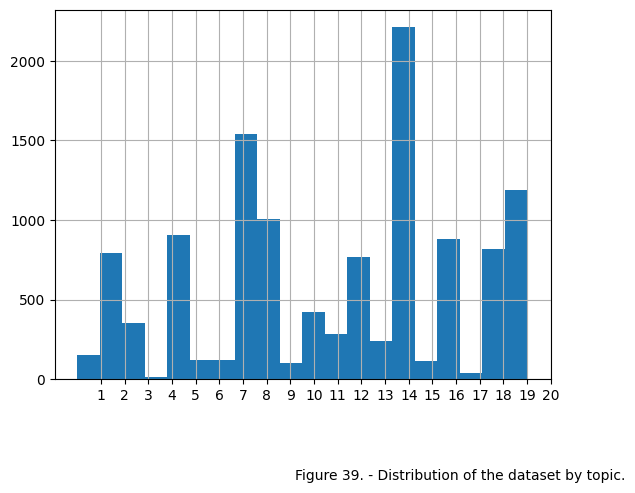

In [115]:
df_with_topic.topic_class.hist(bins=20)
plt.xticks(range(1,21))
plt.figtext(0.5, -0.1, f"Figure {num}. - Distribution of the dataset by topic.")
plt.show()
num += 1

In [116]:
df_with_topic.topic_class.value_counts()

topic_class
14    2211
7     1543
19    1191
8     1005
4      908
16     878
18     820
1      790
12     767
10     423
2      351
11     285
13     237
0      154
6      120
5      119
15     113
9      101
17      40
3       15
Name: count, dtype: int64

In [117]:
print(f"The largest number of reviews belongs to a topic/wine reviewer with a given style with an index {df_with_topic.topic_class.value_counts().index[0]}.")

The largest number of reviews belongs to a topic/wine reviewer with a given style with an index 14.


In [118]:
import re
topic_14 =", ".join(re.sub(r'[\d\*\"\.\s]', '', test_lda.print_topics(num_words=20)[14][1]).split("+"))
print(f"Topic 14 is characterized by the words: {topic_14}.")

Topic 14 is characterized by the words: aroma, flavor, finish, palate, plum, fruit, wine, berry, nose, note, cherry, feel, black, spice, herbal, red, fresh, show, bit, offer.


In [119]:
topic = df_with_topic[df_with_topic['topic_class']==df_with_topic.topic_class.value_counts().index[0]]
topic.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world,combine,topic_class
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe,Italy81,14
6,US,Addictive aromas of hot blackberry pie laced w...,93,40.0,California,Santa Barbara County,Syrah,Mulvane Wine Co.,red,North America,US93,14
7,US,Marc Piro broke away from his day job at Au Bo...,93,44.0,California,Santa Maria Valley,Pinot Noir,Piro,red,North America,US93,14
10,Chile,"Pithy and peachy on the nose, and not nearly a...",89,20.0,Leyda Valley,Central Valley,Sauvignon Blanc,Santa Rita,white,Latin America,Chile89,14
13,US,This selection (above reserve) from the estate...,85,60.0,Oregon,Oregon,Pinot Noir,Iris Vineyards,red,North America,US85,14


Данная словарная тема(условный критик) к тяготеет следующим распределениям:

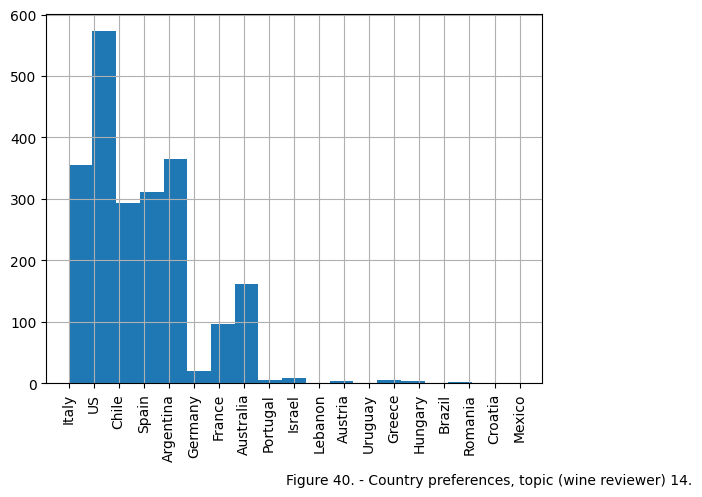

In [120]:
topic.country.hist(bins=len(topic.country.unique()),xrot=90)
plt.figtext(0.5, -0.1, f"Figure {num}. - Country preferences, topic (wine reviewer) 14.")
plt.show()
num += 1

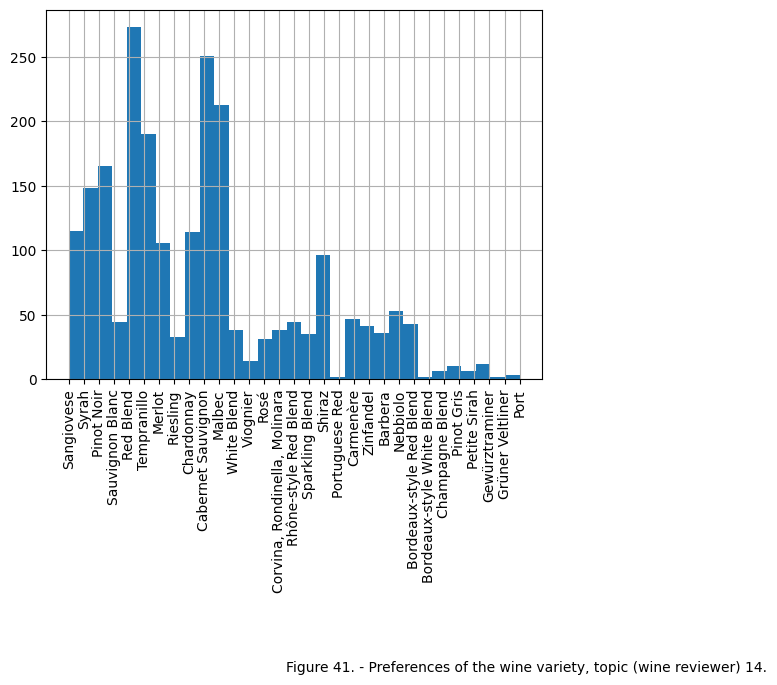

In [121]:
topic.variety.hist(bins=len(topic.variety.unique()),xrot=90)
plt.figtext(0.5, -0.5, f"Figure {num}. - Preferences of the wine variety, topic (wine reviewer) 14.")
plt.show()
num += 1

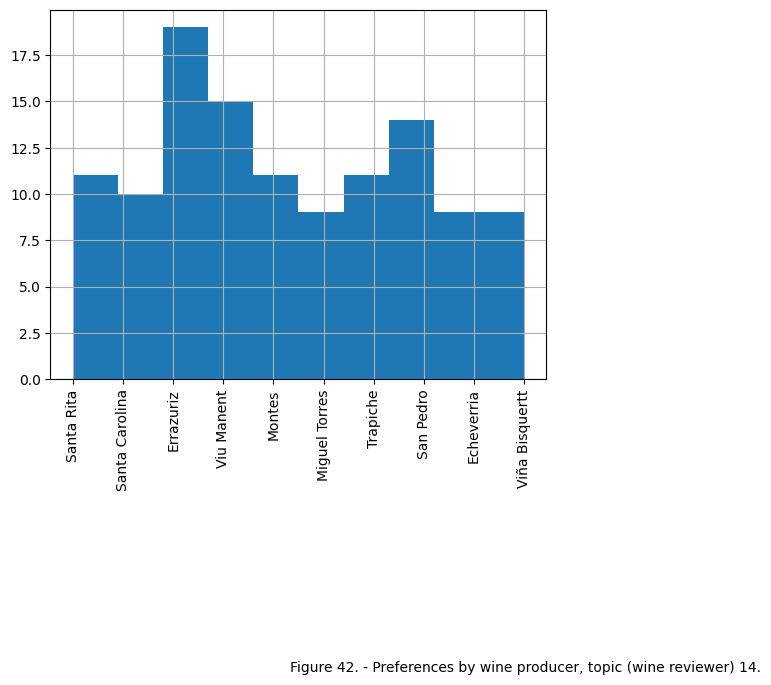

In [122]:
bins = 10
fav_winery = topic.winery.value_counts().index[:bins]
topic[topic['winery'].isin(fav_winery)]['winery'].hist(bins=bins,xrot=90)
plt.figtext(0.5, -0.5, f"Figure {num}. - Preferences by wine producer, topic (wine reviewer) 14.")
plt.show()
num += 1

In [123]:
print(f"For this topic (wine reviewer), wines of the production are preferred \
{topic.country.value_counts().index[0]}, сорта {topic.variety.value_counts().index[0]}, \
produced by {fav_winery.value_counts().index[0]} winery.")

For this topic (wine reviewer), wines of the production are preferred US, сорта Red Blend, produced by Errazuriz winery.


### <a id="4">4. Hypothesis testing </a>

1. Test hypotheses:
- H0: The rating for French-made wine and Italian-made wine are the same
- H1: Rating for wine produced in France and for wine produced in Italy of various
- Reformulate
- H0: The rating for French-made wine and Italian-made wine are the same
- H1: The rating for French-made wine is higher (lower) for Italian-made wine
2. Test hypotheses:
- H0: The price of red wine and white are the same
- H1: The price of red wine and white are different
- Reformulate
- H0: The price of red wine and white wine are the same
- H1: The price of red wine is higher (lower) than white

**H0:The rating for French-made wine and Italian-made wine are the same**

**H1: The rating for French-made wine and Italian-made wine are different**

In [124]:
France_rating = df[df['country'] == 'France'].points
Italy_rating = df[df['country'] == 'Italy'].points
print("Number of ratings for France =", France_rating.count())
print("Number of ratings for Italy =", Italy_rating.count())

Number of ratings for France = 1493
Number of ratings for Italy = 1350


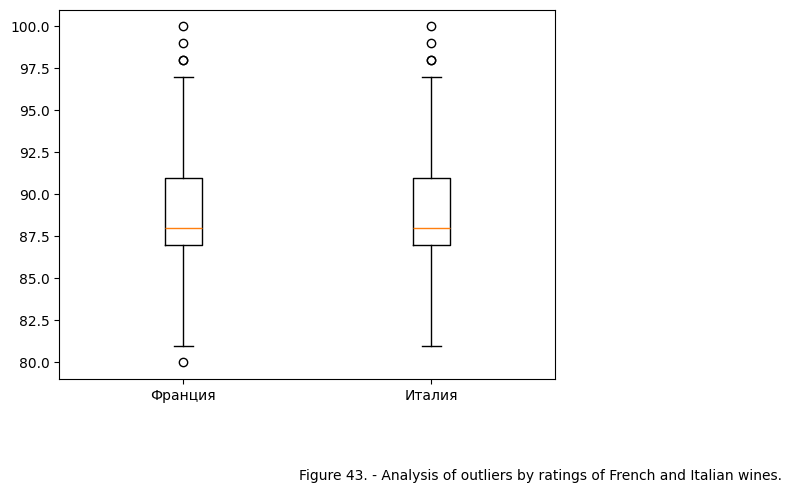

In [125]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by ratings of French and Italian wines.")
plt.show()
num += 1

In [126]:
whis

[array([87., 81.]), array([91., 97.]), array([87., 81.]), array([91., 97.])]

In [127]:
print("Let's remove outliers.")
France_rating = df[(df['country'] == 'France') & (df['points'] <= max(whis[1])) & (df['points'] >= min(whis[0]))].points 
Italy_rating = df[(df['country'] == 'Italy') & (df['points'] <= max(whis[3]))].points

Let's remove outliers.


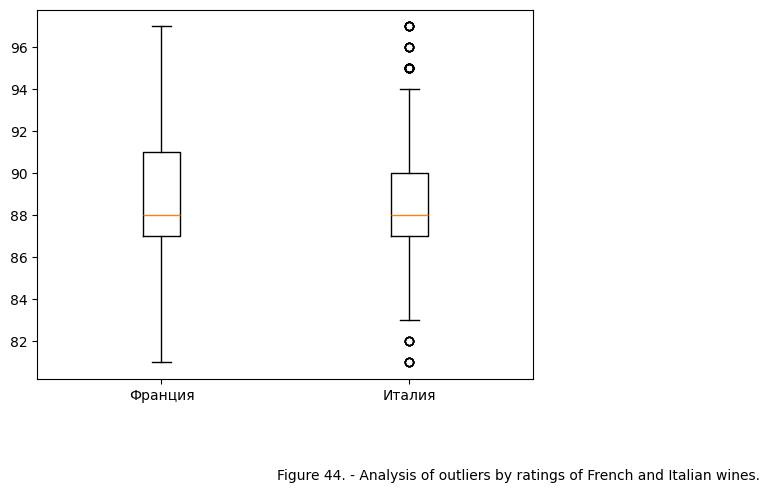

In [128]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by ratings of French and Italian wines.")
plt.show()
num += 1

In [129]:
whis

[array([87., 81.]), array([91., 97.]), array([87., 83.]), array([90., 94.])]

In [130]:
print("Let's remove outliers.")
Italy_rating = df[(df['country'] == 'Italy') & (df['points'] <= max(whis[3])) & (df['points'] >= min(whis[2]))].points

Let's remove outliers.


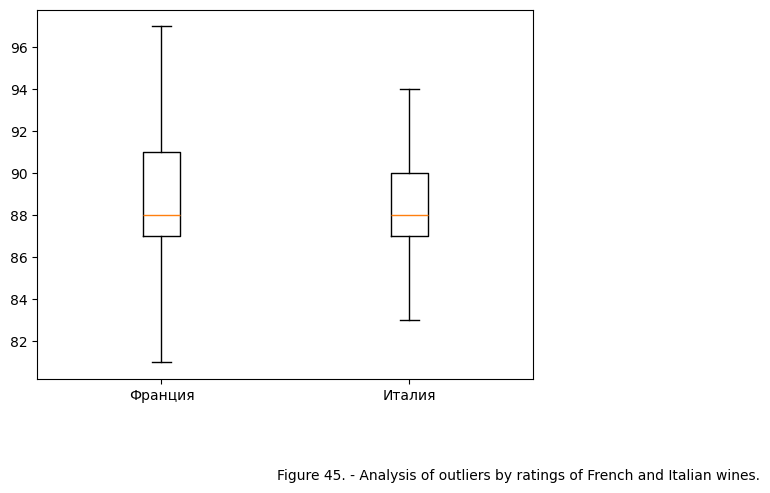

In [131]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by ratings of French and Italian wines.")
plt.show()
num += 1

In [132]:
print("Number of ratings for France =", France_rating.count())
print("Number of ratings for Italy =", Italy_rating.count())

Number of ratings for France = 1488
Number of ratings for Italy = 1302


In [133]:
import scipy.stats as st
#Levene's criterion tests the null hypothesis that the variances of the population are equal
st.levene(France_rating, Italy_rating)

LeveneResult(statistic=46.43823359300174, pvalue=1.154215622375648e-11)

In [134]:
value, p = st.normaltest(France_rating.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

2.023745272289549 0.3635375681627108
Presumably, the distribution is normal.


In [135]:

value, p = st.normaltest(Italy_rating.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

1.0582597538557434 0.5891173513280616
Presumably, the distribution is normal.


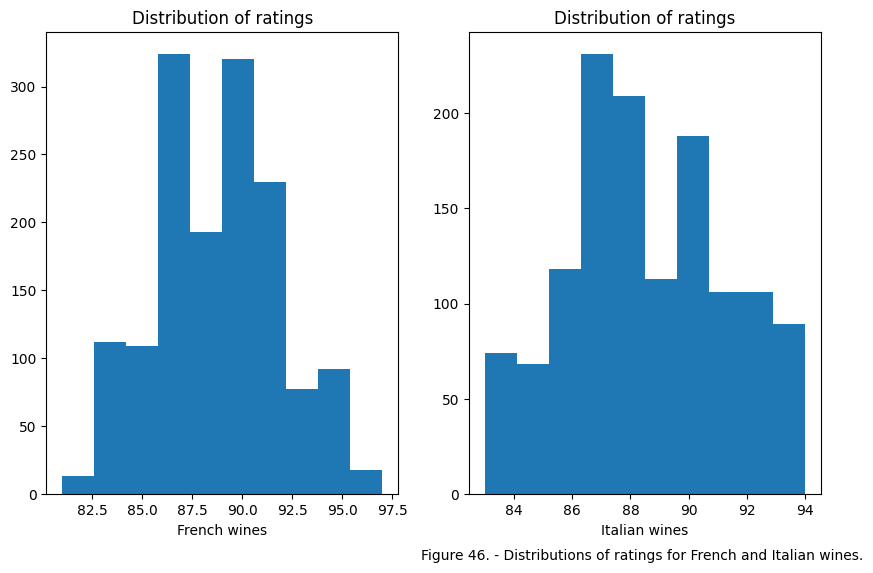

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(France_rating)
ax[0].set_title("Distribution of ratings")
ax[0].set_xlabel("French wines")
ax[1].hist(Italy_rating)
ax[1].set_title("Distribution of ratings")
ax[1].set_xlabel("Italian wines")
plt.figtext(0.5, -0.0, f"Figure {num}. - Distributions of ratings for French and Italian wines.")
plt.show()
num += 1

Hypothesis testing:

H0: The ratings of French-made wine and Italian-made wine are the same 

H1: Ratings of wines produced in France and wines produced in Italy of various

In [137]:
alpha = .05             
results = st.ttest_ind(
                        France_rating, 
                        Italy_rating, 
                        equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Null hypothesis rejected")
else:
    print("Null hypothesis supported")

p-value:  0.1049831847213287
Null hypothesis supported


**If the null hypothesis is accepted, it makes no sense to check alternative hypotheses about the equality of sample averages.**

##### Conclusion: in the context of comparing the average wine ratings of France and Italy:
##### To reject the hypothesis about the equality of the average ratings of French and Italian wine - it did not work. The hypothesis of the equality of the average ratings of French and Italian wine is accepted.

**H0: The price of red wine and white wine are the same** 

**H1: The price of red wine and white wine are different**

In [138]:
redWinePrice = df[df['color'] == 'red'].price
whiteWinePrice = df[df['color'] == 'white'].price
print("Number of red wine prices =", redWinePrice.count())
print("Number of white wine prices =", whiteWinePrice.count())

Number of red wine prices = 8153
Number of white wine prices = 3278


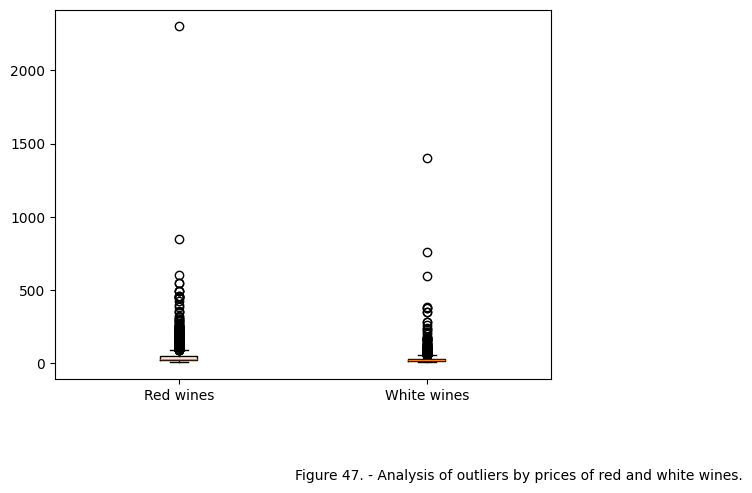

In [139]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Red wines', 'White wines'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by prices of red and white wines.")
plt.show()
num += 1

In [140]:
whis_color

[array([19.,  5.]), array([48., 91.]), array([15.,  5.]), array([31., 55.])]

In [141]:
print("Let's remove outliers.")
redWinePrice = df[(df['color'] == 'red') & (df['price'] <= max(whis_color[1]))].price
whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Let's remove outliers.


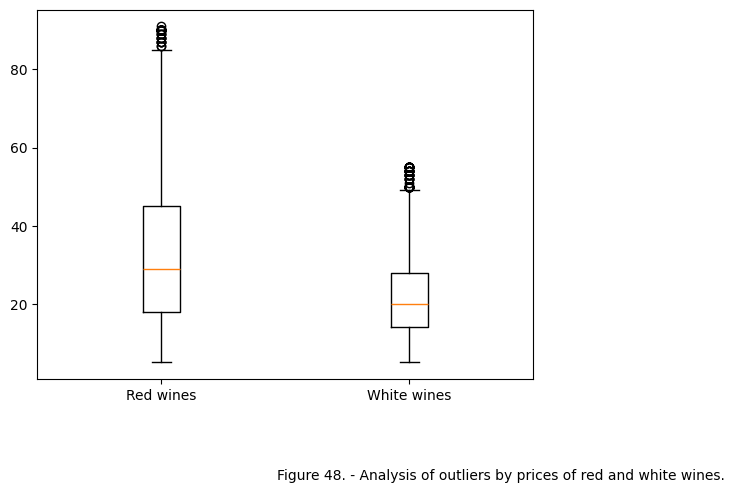

In [142]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Red wines', 'White wines'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by prices of red and white wines.")
plt.show()
num += 1

In [143]:
whis_color

[array([18.,  5.]), array([45., 85.]), array([14.,  5.]), array([28., 49.])]

In [144]:
print("Let's remove outliers.")
redWinePrice = df[(df['color'] == 'red') & (df['price'] <= max(whis_color[1]))].price
whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Let's remove outliers.


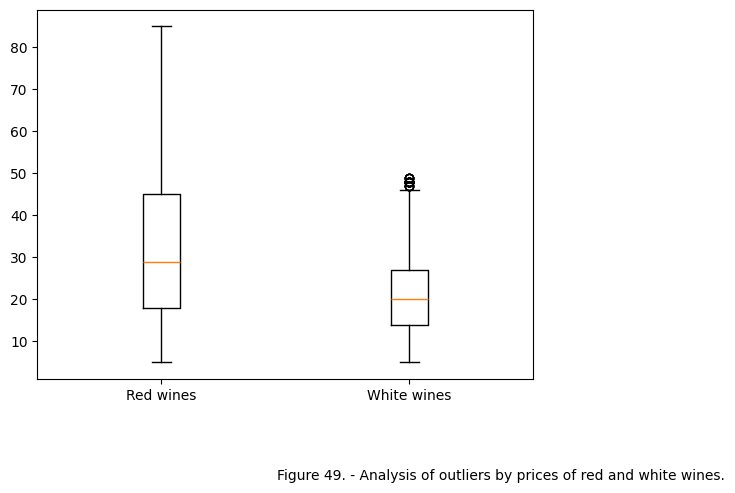

In [145]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Red wines', 'White wines'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by prices of red and white wines.")
plt.show()
num += 1

In [146]:
whis_color

[array([18.,  5.]), array([45., 85.]), array([14.,  5.]), array([27., 46.])]

In [147]:
print("Let's remove outliers.")

whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Let's remove outliers.


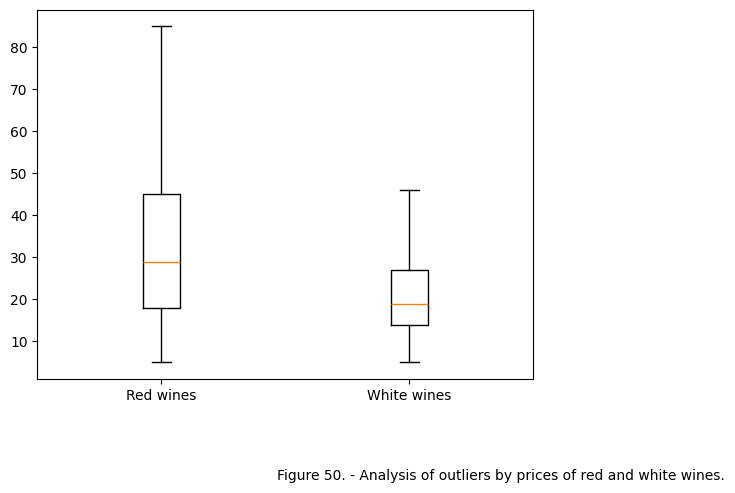

In [148]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Red wines', 'White wines'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Figure {num}. - Analysis of outliers by prices of red and white wines.")
plt.show()
num += 1

In [149]:
print("Number of red wine prices =", redWinePrice.count())
print("Number of white wine prices =", whiteWinePrice.count())

Number of red wine prices = 7672
Number of white wine prices = 2931


In [150]:
st.levene(redWinePrice, whiteWinePrice)

LeveneResult(statistic=970.0250014907438, pvalue=7.509402023433882e-204)

In [151]:
value, p = st.normaltest(redWinePrice.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

6.33777628042816 0.04205032598754324
Presumably, the distribution is not normal.


In [152]:
value, p = st.normaltest(whiteWinePrice.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

7.348215420594385 0.025372034630603724
Presumably, the distribution is not normal.


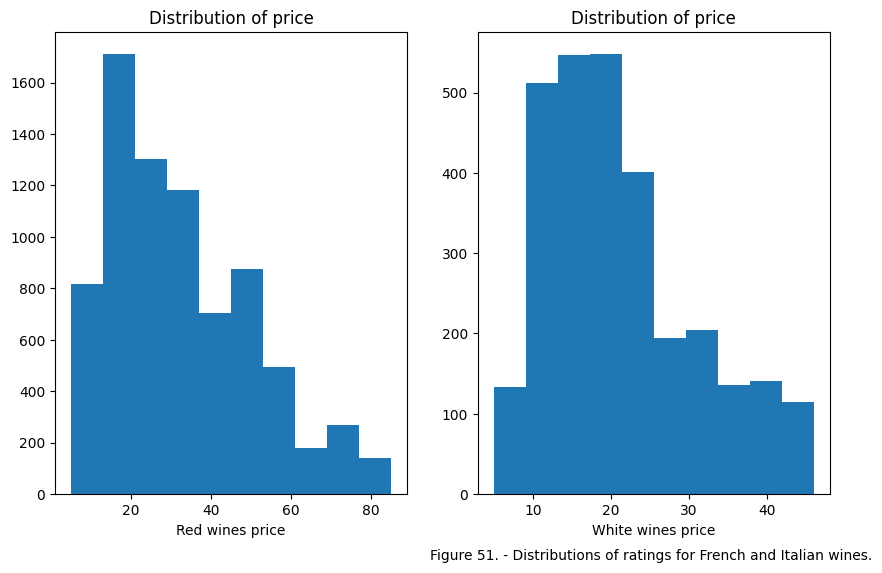

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(redWinePrice)
ax[0].set_title("Distribution of price")
ax[0].set_xlabel("Red wines price")
ax[1].hist(whiteWinePrice)
ax[1].set_title("Distribution of price")
ax[1].set_xlabel("White wines price")
plt.figtext(0.5, -0.0, f"Figure {num}. - Distributions of ratings for French and Italian wines.")
plt.show()
num += 1

Assuming that data can not be considered normal let's apply square root transformation to it.

In [154]:
redWinePrice = np.sqrt(redWinePrice)
whiteWinePrice = np.sqrt(whiteWinePrice)

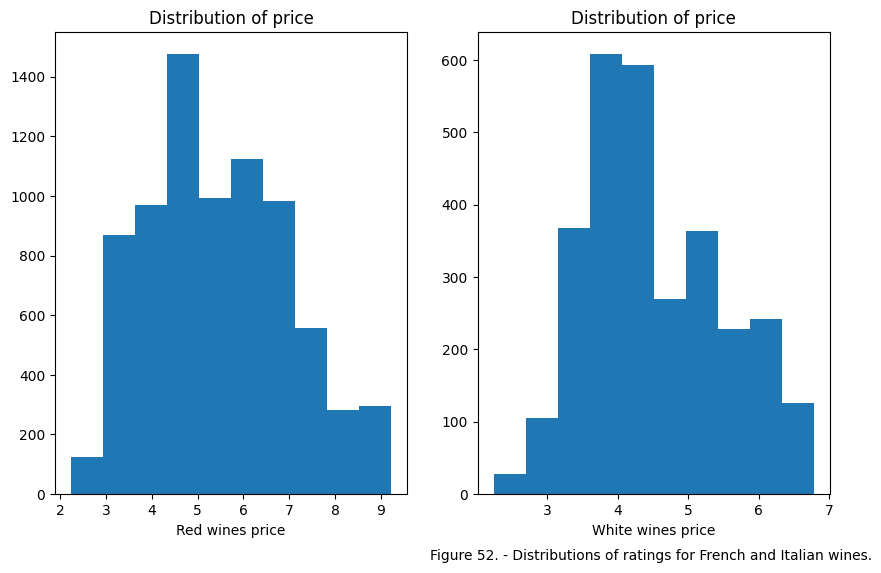

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(redWinePrice)
ax[0].set_title("Distribution of price")
ax[0].set_xlabel("Red wines price")
ax[1].hist(whiteWinePrice)
ax[1].set_title("Distribution of price")
ax[1].set_xlabel("White wines price")
plt.figtext(0.5, -0.0, f"Figure {num}. - Distributions of ratings for French and Italian wines.")
plt.show()
num += 1

In [156]:
value, p = st.normaltest(redWinePrice.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

2.4033111770260955 0.3006959707897088
Presumably, the distribution is normal.


In [157]:
value, p = st.normaltest(whiteWinePrice.sample(50, random_state = rand_state))
print(value, p)
if p >= 0.05:
    print('Presumably, the distribution is normal.')
else:
    print('Presumably, the distribution is not normal.')

2.1584605140916677 0.3398570275397793
Presumably, the distribution is normal.


In [158]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Null hypothesis rejected")
else:
    print("Null hypothesis supported")

p-value:  6.845454847731713e-298
Null hypothesis rejected


**The result is p-value. The probability that the averages will coincide (H0) in the context of comparison with the alternative hypothesis is too small. The null hypothesis is rejected. Accordingly, an alternative is accepted - the average prices of red and white wines are different**

**H0: The price of red wine and white wine are the same**

**H1: The price of red wine is higher than white**

In [159]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False,
                        alternative='greater')
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Null hypothesis rejected")
else:
    print("Null hypothesis supported")

p-value:  3.4227274238658563e-298
Null hypothesis rejected


**The result is p-value. The probability that the averages will coincide (H0) in the context of comparison with the alternative hypothesis is too small. The null hypothesis is rejected. Accordingly, an alternative is accepted - the average prices of red wines are higher than white ones**

**H0: The price of red wine and white wine are the same**

**H1: The price of red wine is less than white**

In [160]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False,
                        alternative='less')
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Null hypothesis rejected")
else:
    print("Null hypothesis supported")

p-value:  1.0
Null hypothesis supported


**The result is p-value. The probability that the averages will coincide (H0) in the context of comparison with the alternative hypothesis is high. There is absolutely no reason to reject the null hypothesis.**

##### Conclusion: in the context of comparing average prices for red and white wines:
##### 1.It's more likely that the average prices are different than equal.
##### 2.It's more likely that the average price of red wine exceeds the price of white wine than they are equal.
##### 3.It's more likely that the average average prices of red and white wines are equal, than the price of red wine is lower than the price of white.

### <a id="5">5. Regression model showing the relationship of score and price </a>

Let's split the dataset into training and test samples

In [161]:
from sklearn.model_selection import train_test_split
X = df['points'].values.reshape(-1,1)
y = np.log(df['price'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [162]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # model training
w = model.coef_
b = model.intercept_
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

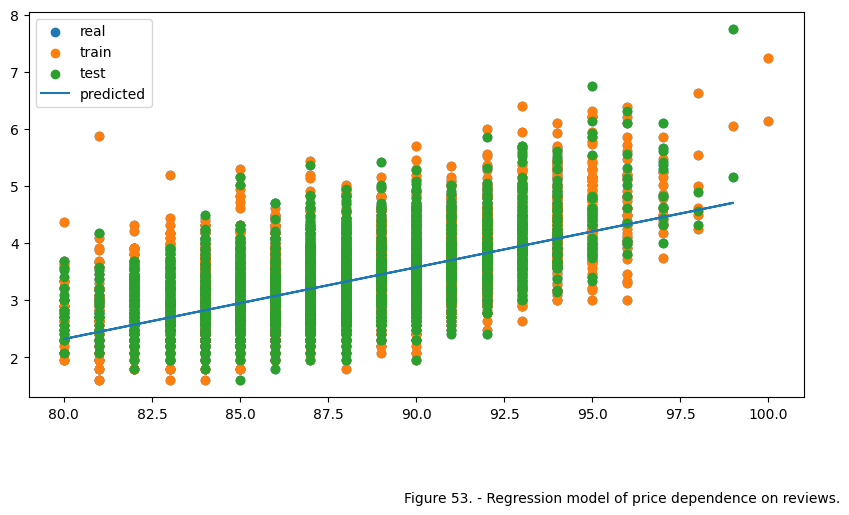

In [163]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_test_predicted, label='predicted')
plt.legend()
plt.figtext(0.5, -0.1, f"Figure {num}. - Regression model of price dependence on reviews.")
plt.show()
num += 1

In [164]:
np.round(w,2)

array([[0.13]])

In [165]:
np.round(b,2)

array([-7.73])

Estimation of model error:

In [166]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  0.27988452055460983
Test MSE:  0.2842343001513946


In [167]:
from sklearn.metrics import mean_absolute_error
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  0.41954953317983845
Test MAE:  0.4229874719309041


In [168]:
print('Train R2: ', r2_score(y_train, y_train_predicted))
print('Test R2: ', r2_score(y_test, y_test_predicted))

Train R2:  0.3864137756255277
Test R2:  0.3712773491047743


Let's refine the model by adding a categorical feature of the wine color:

In [169]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
X = df[['points','color']]
y = np.log(df['price'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [ ]:
X_train_categor = one_hot_encoder.fit_transform(X_train['color'].values.reshape(-1,1))
X_test_categor = one_hot_encoder.transform(X_test['color'].values.reshape(-1,1))

In [ ]:
X_train_other = X_train['points'].values.reshape(-1,1)
X_test_other = X_test['points'].values.reshape(-1,1)

In [ ]:
X_train_categor

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
X_train_concat = np.hstack((X_train_other, X_train_categor))
X_test_concat = np.hstack((X_test_other, X_test_categor))

In [ ]:
model_new = LinearRegression()
model_new.fit(X_train_concat, y_train)
w_new = model_new.coef_
b_new = model_new.intercept_
y_train_predicted_new = model_new.predict(X_train_concat)
y_test_predicted_new = model_new.predict(X_test_concat)

Error estimation of the refined model:

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted_new))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted_new))

Train MSE:  0.2652454233097637
Test MSE:  0.2703529389585794


In [ ]:
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted_new))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted_new))

Train MAE:  0.4056145495199799
Test MAE:  0.4100700061366709


In [ ]:
print('Train R2: ', r2_score(y_train, y_train_predicted_new))
print('Test R2: ', r2_score(y_test, y_test_predicted_new))

Train R2:  0.41850682739172307
Test R2:  0.4019827432198837


Let's compare the quality of the models

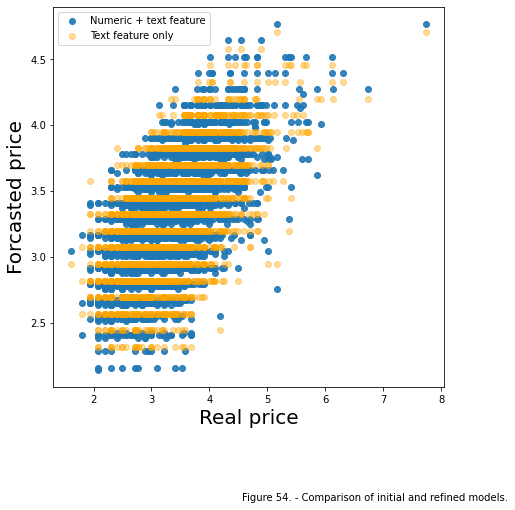

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_predicted_new, alpha=0.9, label='Numeric + text feature');
plt.scatter(y_test, y_test_predicted, color='orange', alpha=0.4, label='Text feature only');
plt.legend()
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Forcasted price', fontsize=20);
plt.figtext(0.5, -0.1, f"Figure {num}. - Comparison of initial and refined models.")

plt.show()
num += 1

Adding the 'wine color' parameter improved the quality of the model

### <a id="6">6. Conclusions </a>

In this final work, a dataset with 20,000 ratings of various categories of wines was used for analysis. The source of this dataset is a selection of wine reviews from the WineEnthusiast magazine.

**Data preprocessing:**
- an assessment of the missing values of the signs was carried out,
-  'region_2' feature was removed the as filled in less than half and 'designation' feature was removed as insignificant for research purposes,
- deleted entries with unspecified prices,
- added features for the color of the wine and the part of the world in which the producer is located,
- deleted entries for which the color of the wine was unknown,
- the region_1 feature was refilled by parsing search results from the site vivino.com , parsing was performed using GET- requests at periodic time intervals. The queries were formed in such a way as to circumvent the site's ban on data collection by search algorithms.
- duplicate entries have been removed.
As a result, a fully filled dataset of 12071 records was obtained.

**Exploratory data analysis**
- The largest number of dataset entries describes American-made wines - 54.8%.
- Accordingly, a greater number of dataset records relate to North America - 54.94%.
- After analyzing the wine provinces, it became clear that most of the records relate to California wines - 39.81%
- The main wine region represented in the dataset is Napa Valley, California - 5.56%.
- The main wine producer in the dataset is Williams Selyem, California, USA - 5.56%
- The largest number of wines in the dataset is represented by producers from the US, with a price range from 6.0 to 300.0 dollars.
- The most expensive wine is presented by a producer from France at a price of \$ 2300.0.
- The cheapest wine is presented by producers from Australia, Portugal and Spain at a price of \$ 5.0.
- Average national wine prices range from \$ 11.67 for Romania to 50.45 for France.
- Merlot and Chardonnay wines turned out to be the best among the wines to which the critics awarded the best 100 points.
- The median wine rating by country varies from 82 points for Brazil and up to 89 points for Austria, Bulgaria, Germany and Slovenia.
- The median rating of wines by variety varies from 86 for Merlot, Rose, Zinfandel to 90 points for Champagne Blend and Nebiollo.
- A narrower range of medians of rating points aggregated by wine varieties compared to the aggregation of medians of rating points  by country, may indicate that the wine variety is more decisive for wine than its country of origin.
- In general, based on the country-by-country analysis of the dependence of prices and reviews, the dependence of price increases with an increase in the rating is quite characteristic for most countries.
- There is a trend that is characterized by an increase in the median price and the constancy of the median rating. When comparing aggregated values across countries as a whole, both for more expensive Italian wines and for cheaper Bulgarian wines, the median rating is stable, which can debunk the myth of elite and expensive wines from Italy.
- For wines from Argentina, Austria, Croatia, Italy, Lebanon, Moldova and Slovenia, there is a positive and fairly stable 'more than 0.5' correlation of rating and price, i.e. the higher the price, the higher the rating.
- For Romanian wines on board, there is a steady negative correlation of rating and price. This fact generally indicates that expectations from more expensive wines have not been met. If we assume that the reviews were collected in a fairly short period of time, we can say that the Romanian wine market should change in the direction of cheaper prices, since supply follows demand.
- The most common varieties of dataset wine are Cabernet Savignon and Pinot Noir of American production.
- The best rating is given to wines from Tuscany (Italy), Champagne, Piedmont, Bordeaux (France) and Douro (Portugal).
- The cost of the cheapest and most expensive wine selected from the highly valued wines varies by 13.14 times. This fact indicates that the general dependence  the higher the price, the higher the rating,  can be violated.
- Wines with a higher rating are produced in Europe.
- Descriptions of wines with a higher rating are examples of a highly poetic ode and include such categories as softness, purity, complex balance of qualities, grandeur, subtlety, shameless luxury, velvety, long aftertaste, sensual dryness, excellent balance of qualities.
- The average cost of the wine with the highest rating in the country varies from $ 9 for Romania to $ 1400 for France.
- Wineries producing the most expensive/highly valued wines: Chateau Latour, Circle, Tenuta d'Ornellaya.

**Analysis of Chardonnay wine features.**
- Chardonnay is a white wine, the main producers of which are the USA and France.
- The main regions of Chardonnay production are american regions:  Russian River Valley, Napa Valley, Carneros, California, Columbia Valley and Chablis (France).
- The main region of Chardonnay production is the Russian River Valley.
- The median price of a bottle of Chardonnay is kept at $20.
- The most expensive Chardonnay of the main regions of production, is produced at the winery of Domain Laroche.
- The median score of Chardonnay wines is 87 points.
- There is a peculiarity in the distribution of ratings of Chardonnay wines - wines with a score of 89 points are relatively rare, while 41% of wineries/brands producing these wines are not represented among wine producers with ratings above and below 89 points. The main assumption is that Laird, Gordon Brothers, Porter Family Vineyards, Barnard Griffin, Mahoney, Chateau Sovereign, Roman Bouchard wineries are new, previously unknown to critics or undisclosed wineries/brands.

**Portrait of a wine reviewer**
- For the purposes of this work , two approaches are possible to describe the portrait of the wine reviewer:
    1. All submitted reviews in the dataset were made by 1 person. In this case, all the information provided in the dataset can serve as a description of the preferences of this person.
    2. The estimates presented in the dataset were made by several people - in this case, given the fact that the borders between countries are open, it is difficult to rely on most of the features to classify the dataset to describe the user's portrait, because an enthusiastic wine connoisseur can afford wine of any province, region and part of the world in conditions of availability of the necessary resources. Nevertheless, we can assume that the wine connoisseur has his own style, approach and vocabulary, which he uses to describe his impressions of wine, in other words, to use the attribute 'desciption' to classify the dataset.
- The Gensim python library was used to classify the dataset according to the second variant. As a result of the analysis of the coherence of topics, the peak of the coherence value was recorded with the number of topics equal to 20. A topic is called coherent if the words most frequent in a given topic are not coincidentally and often found together side by side in the documents of the collection on the basis of which the topic is formed.
- Wine descriptions can be grouped by 20 topic groups. It can also be assumed that they were written by 20 wine reviewers. The topics groups are assigned indexes from 0 to 19.
- The largest number of reviews belongs to the topic group (made by potential wine reviewer) with an index of 14.
- Topic 14 is characterized by the words: aroma, flavor, finish, palate, plum, fruit, wine, berry, nose, note, cherry, feel, black, spice, herbal, red, fresh, show, bit, offer.
- For this topic group (potential wine reviewer), American-made wines, Red Blend varieties, Errazuris wineries are preferred.

**Hypothesis testing**
- In this paper, two hypotheses were tested:
    1. Comparison of sample average ratings of French and Italian wine.
    2. Comparison of sample average prices of red and white wine.
- In the context of hypothesis testing two decisions were made:
    1. Reject the hypothesis about the equality of the average ratings of French and Italian wine - it did not work. The hypothesis of the equality of the average ratings of French and Italian wine is accepted.
    2. The hypothesis of equality of average prices for red and white wines was rejected. The hypothesis of the difference in average prices for red and white wines was accepted. When considering alternative hypotheses, conclusions were formed that it is more likely that the average price of red wine exceeds the price of white than they are equal, and also that it is more likely that the average average prices of red and white wines are equal than the price of red wine is lower than the price of white.

**Regression model of the relationship between review points and price**
- One of the goals of this work was to prove the possibility of constructing a linear regression model of price dependence on reviews.
- As a result, this model was built with coefficient of 0.12 and a constant term of -7.73.
- Model quality metrics on a test sample (30% of the dataset):
    1. MSE: 0.28,
    2. MAE: 0.42,
    3. R^2: 0.37
- For the purpose of increasing the quality of the model, the categorical feature 'wine color' was added.
- The quality metrics of the model in the test sample (30% of the dataset) have improved:
    1. MSE: 0.27,
    2. MAE: 0.41,
    3. R^2: 0.40

<center>List of references</center>

1. C. Anderson C., Creating a DataDriven Organization, O’Reilly Media, Inc., 2015.
2. B. Bengfort, R. Bilbro, T. Ojeda,  Applied Text Analysis with Python: Enabling Language-Aware Data Products with Machine Learning, O’Reilly Media, Inc., 2018.
3. E. Matthes, Python Crash Course: A Hands-On, Project-Based Introduction to Programming, No Starch Press, 2019. 
4. J. VanderPlas, Python Data Science Handbook: Essential Tools for Working with Data, O'Reilly Media, 2017.
5. S. Raschka, Y. Liu, Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python, Packt Publishing, 2022.
6. B. Sjardin, L. Massaron, A. Boschetti, Large Scale Machine Learning with Python, Packt Publishing, 2016.